# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**Sin mirar el Dataset, los datos en los que pensaría para poder resolver el problema y su relación con el precio, serían:**

-Antigüedad del inmueble (años): inmuebles con mas años de antigüedad, se supone que afectarán de manera negativa el precio.

-Estado general del inmueble (malo, bueno, muy bueno, excelente): un inmueble en mal estado, se supone que afectará de manera negativa el precio.

-Metros cuadrados del inmueble (m2): a mayor cantidad de m2, se esperaría que el precio debería ser mayor.

-Ubicación del inmueble (microcentro, centro, macrocentro, afueras): ubicación en el centro, deberían ser mas caras que aquellas ubicadas en las afueras o macrocentro. 

-Tipo de vivienda (departamento, casa, casa interna): el tipo de vivienda influye en el precio. En general, las casas son mas caras que los departamentos.

-Cercanía a zonas de interés (supermercado, paradas de buses): inmuebles cercanos a supermercado o parada de buses, son siempre buscados, por lo que se eperaría que su precio fuera mayor.

-Número de ambientes (número de habitaciones, número de baños): se espera que a mayor número de ambientes, el precio del inmueble sea mayor.

-Características del inmueble como: aire acondicionado, calefacción central. Propiedades con este tipo de comodidades, deberían tener un mayor precio, ya que agregan comodidad al inmueble.

-Para la categoría departamento, el edificio: ¿tiene pileta?, ¿salón de usos múltiples (SUM)?. En los departamentos, la existencia de ammenities debería aumentar el precio de los mismos.

-Para la categoría casa: ¿tiene pileta?. Las casas con pileta, deberían tener un precio mas elevado, ya que es muy aprovechado en la estación de verano.

Todas los datos antes mencionados, influyen de manera individual o conjuntamente a determinar el precio de una propiedad.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import folium
from sklearn.model_selection import GridSearchCV

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

**Cargo el dataset**

In [2]:
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

**Imprimo las primeras (head) y últimas (tail) 5 intancias para tener idea de como se presenta el dataset**

In [3]:
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [4]:
df.tail()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta
146659,2019-07-31,2019-10-12,2019-07-31,-34.444760,-58.981885,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,2.0,1.0,75.0,75.0,98000.0,USD,Departamento en venta en Manzanares Chico,"Departamento en el Barrio Manzanares Chico , e...",Departamento,Venta


**¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?**

In [5]:
df.size

2786540

El dataset tiene un tamaño de 2786540 elementos en total.

In [6]:
df.shape

(146660, 19)

El número de instancias es de 146660 y el número de columnas es de 19

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [7]:
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

**Los nombres de las columnas son:** 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency', 'title', 'description', 'property_type' y 'operation_type

El significado de cada columna es (info extraída de https://www.properati.com.ar/data):

'start_date': Fecha de alta del aviso. 

'end_date': Fecha de baja del aviso.

'created_on': Fecha de alta de la primera versión del aviso.

'lat': Latitud. 

'lon': Longitud.

'l1: País.

'l2': Zonas.

'l3’: Barrio/ciudad.

'rooms': Ambientes.

'bedrooms': Habitaciones.

'bathrooms: Baños. 

'surface_total': Superficie total en m2.

'surface_covered': Superficie cubierta en m2.

'price': Precio.

'currency': Moneda.

'title': Título del anuncio.

'description': Descripción del anuncio.

'property_type': Tipo de propiedad.

'operation_type': Tipo de operación.

**¿Cuántos valores faltantes hay en cada columna?**

**El número de datos faltantes por columna es (columna: número de datos faltantes):**

In [8]:
df.isna().sum(axis=0)

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

**¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.**

**Chequeo el tipo de varaible de cada columna**

In [9]:
df.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [10]:
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


## Variables numéricas

- Realicé histogramas sobre todas las variables numéricas

**Ambientes (rooms)**

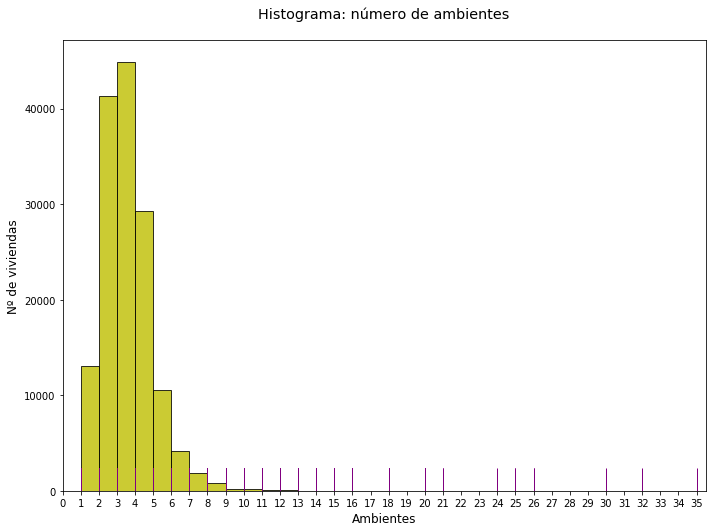

In [11]:
plt.figure(figsize = (10,7.5))
plt.hist(df['rooms'], bins = range(0,36,1), alpha = 0.8, edgecolor='black', linewidth=1, color = 'y')
sns.rugplot(df['rooms'], color = 'purple')
plt.xticks(np.arange(0, 36, 1))
plt.xlim(0,35.5)
plt.title ('Histograma: número de ambientes\n', fontsize = 'x-large')
plt.xlabel('Ambientes', fontsize = 'large')
plt.ylabel('Nº de viviendas', fontsize = 'large')
plt.tight_layout()

In [12]:
print('La media del número de ambientes es:', np.mean(df['rooms']),'\n')
print('El desvío estándar del número de ambientes es:', np.std(df['rooms']),'\n')
print('El valor máximo de ambientes es:', np.max(df['rooms']), '\n')
print('El valor mínimo de ambientes es:', np.min(df['rooms']),'\n')
print('Otras medidas de estadística descriptiva de la variable son:')
df['rooms'].describe()

La media del número de ambientes es: 3.07981726442111 

El desvío estándar del número de ambientes es: 1.4163470123118302 

El valor máximo de ambientes es: 35.0 

El valor mínimo de ambientes es: 1.0 

Otras medidas de estadística descriptiva de la variable son:


count    146660.000000
mean          3.079817
std           1.416352
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          35.000000
Name: rooms, dtype: float64

La media es de 3.08 ± 1.42. El parámetro 'rug' marca los lugares donde hay información (aunque no se vean barras en el histograma), y esto nos permite observar que haya vivendas con mayor número de ambientes.

La distribución es asimétrica positiva.

**Habitaciones (bedrooms)**

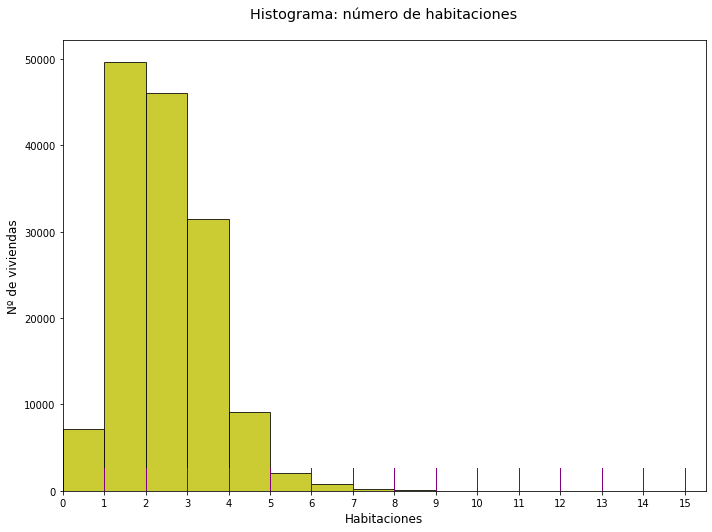

In [13]:
plt.figure(figsize = (10,7.5))
plt.hist(df['bedrooms'], bins = range(0,16,1), alpha = 0.8, edgecolor='black', linewidth=1, color = 'y')
sns.rugplot(df['bedrooms'], color = 'purple')
plt.xticks(np.arange(0, 16, 1))
plt.xlim(0,15.5)
plt.title ('Histograma: número de habitaciones\n', fontsize = 'x-large')
plt.xlabel('Habitaciones', fontsize = 'large')
plt.ylabel('Nº de viviendas', fontsize = 'large')
plt.tight_layout()

In [14]:
print('La media del número de habitaciones es:', np.mean(df['bedrooms']),'\n')
print('El desvío estándar del número de habitaciones es:', np.std(df['bedrooms']),'\n')
print('El valor máximo de habitaciones es:', np.max(df['bedrooms']),'\n')
print('El valor mínimo de habitaciones es:', np.min(df['bedrooms']), '\n')

print('Otras medidas de estadística descriptiva de la variable son:')
df['bedrooms'].describe()

La media del número de habitaciones es: 1.9832401472794219 

El desvío estándar del número de habitaciones es: 1.1513005715929994 

El valor máximo de habitaciones es: 15.0 

El valor mínimo de habitaciones es: 0.0 

Otras medidas de estadística descriptiva de la variable son:


count    146660.000000
mean          1.983240
std           1.151304
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          15.000000
Name: bedrooms, dtype: float64

La media es de 1.98 ± 1.15. El parámetro 'rug' marca los lugares donde hay información (aunque no se vean barras en el histograma), y esto nos permite observar que haya vivendas con mayor número de habitaciones.

La distribución es asimétrica positiva.

**Baños (bathrooms)**

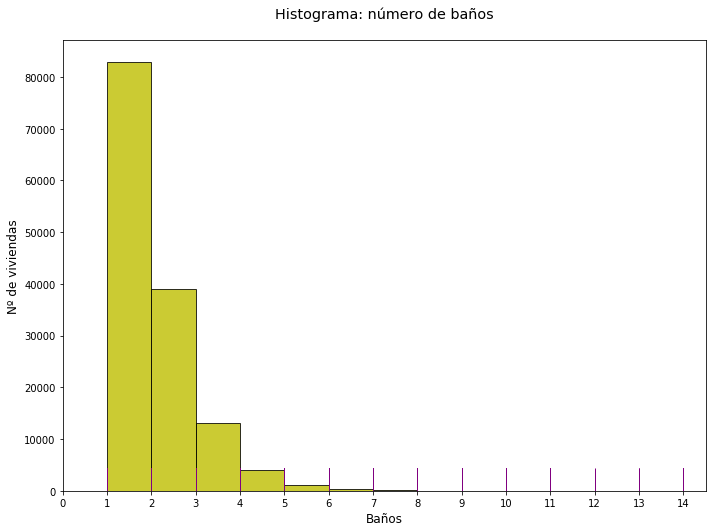

In [15]:
plt.figure(figsize = (10,7.5))
plt.hist(df['bathrooms'][~np.isnan(df['bathrooms'])], bins = range(0,15,1), alpha = 0.8, edgecolor='black', 
         linewidth=1, color = 'y')
sns.rugplot(df['bathrooms'], color = 'purple')
plt.xticks(np.arange(0, 15, 1))
plt.xlim(0,14.5)
plt.title ('Histograma: número de baños\n', fontsize = 'x-large')
plt.xlabel('Baños', fontsize = 'large')
plt.ylabel('Nº de viviendas', fontsize = 'large')
plt.tight_layout()

In [16]:
print('La media del número de baños es:', np.mean(df['bathrooms']),'\n')
print('El desvío estándar del número de baños es:', np.std(df['bathrooms']),'\n')
print('El valor máximo de baños es:', np.max(df['bathrooms']),'\n')
print('El valor mínimo de baños es:', np.min(df['bathrooms']),'\n')

print('Otras medidas de estadística descriptiva de la variable son:')
df['bathrooms'].describe()

La media del número de baños es: 1.599994314264799 

El desvío estándar del número de baños es: 0.8893211010366472 

El valor máximo de baños es: 14.0 

El valor mínimo de baños es: 1.0 

Otras medidas de estadística descriptiva de la variable son:


count    140703.000000
mean          1.599994
std           0.889324
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          14.000000
Name: bathrooms, dtype: float64

La media es de 1.6 ± 0.89. El parámetro 'rug' marca los lugares donde hay información (aunque no se vean barras en el histograma), y esto nos permite observar que haya vivendas con mayor número de baños.

La distribución es asimétrica positiva.

**Superficie total (surface_total)**

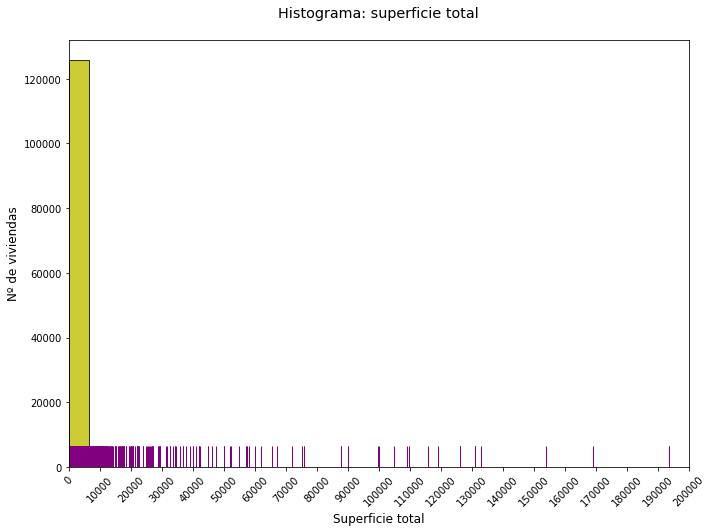

In [17]:
plt.figure(figsize = (10,7.5))
plt.hist(df['surface_total'][~np.isnan(df['surface_total'])], bins = 30, alpha = 0.8, edgecolor='black', 
         linewidth=1, color = 'y')
sns.rugplot(df['surface_total'], color = 'purple')
plt.xticks(np.arange(0, 200001, 10000),rotation = 45)
plt.xlim(0,200001)
plt.title ('Histograma: superficie total\n', fontsize = 'x-large')
plt.xlabel('Superficie total', fontsize = 'large')
plt.ylabel('Nº de viviendas', fontsize = 'large')
plt.tight_layout()

In [18]:
print('La media de la superficie total es:', np.mean(df['surface_total']),'\n')
print('El desvío estándar de la superficie total es:', np.std(df['surface_total']), '\n')
print('La mediana de la superficie total es:', df['surface_total'].median(),'\n')
print('El valor máximo de la superficie total es:', np.max(df['surface_total']), '\n')
print('El valor mínimo de la superficie total es:', np.min(df['surface_total']), '\n')

print('Otras medidas de estadística descriptiva de la variable son:')
df['surface_total'].describe()

La media de la superficie total es: 216.872888141882 

El desvío estándar de la superficie total es: 2037.5985717261613 

La mediana de la superficie total es: 78.0 

El valor máximo de la superficie total es: 193549.0 

El valor mínimo de la superficie total es: 10.0 

Otras medidas de estadística descriptiva de la variable son:


count    126133.000000
mean        216.872888
std        2037.606649
min          10.000000
25%          52.000000
50%          78.000000
75%         140.000000
max      193549.000000
Name: surface_total, dtype: float64

La media es de 216.87 ± 2037.6. Al observar la existencia de datos "atípicos", se puede obtener el valor de la mediana que es de 78. El parámetro 'rug' marca los lugares donde hay información (aunque no se vean barras en el histograma), y esto nos permite observar que haya vivendas con mayor superficie total.

**Superficie cubierta (surface_covered)**

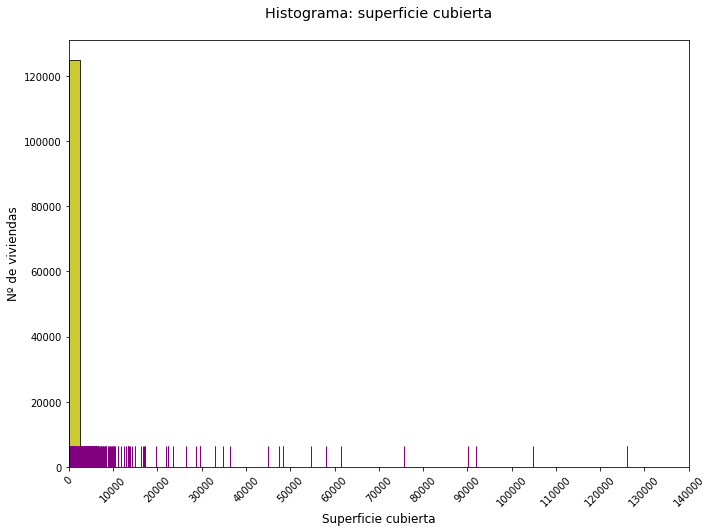

In [19]:
plt.figure(figsize = (10,7.5))
plt.hist(df['surface_covered'][~np.isnan(df['surface_covered'])], bins = 50, alpha = 0.8, edgecolor='black', 
         linewidth=1, color = 'y')
sns.rugplot(df['surface_covered'], color = 'purple')
plt.xticks(np.arange(0, 140001, 10000), rotation = 45)
plt.xlim(0,140001)
plt.title ('Histograma: superficie cubierta\n', fontsize = 'x-large')
plt.xlabel('Superficie cubierta', fontsize = 'large')
plt.ylabel('Nº de viviendas', fontsize = 'large')
plt.tight_layout()

In [20]:
print('La media de la superficie cubierta es:', np.mean(df['surface_covered']), '\n')
print('El desvío estándar de la superficie cubierta es:', np.std(df['surface_covered']), '\n')
print('La mediana de la superficie cubierta es:', df['surface_covered'].median(), '\n')
print('El valor máximo de la superficie cubierta es:', np.max(df['surface_covered']), '\n')
print('El valor mínimo de la superficie cubierta es:', np.min(df['surface_covered']), '\n')

print('Otras medidas de estadística descriptiva de la variable son:')
df['surface_covered'].describe()

La media de la superficie cubierta es: 112.81801097196232 

El desvío estándar de la superficie cubierta es: 916.853917623032 

La mediana de la superficie cubierta es: 68.0 

El valor máximo de la superficie cubierta es: 126062.0 

El valor mínimo de la superficie cubierta es: 1.0 

Otras medidas de estadística descriptiva de la variable son:


count    125046.000000
mean        112.818011
std         916.857584
min           1.000000
25%          47.000000
50%          68.000000
75%         108.000000
max      126062.000000
Name: surface_covered, dtype: float64

La media es de 2112.82 ± 916.85. Al observar la existencia de datos "atípicos", se puede obtener el valor de la mediana que es de 68. El parámetro 'rug' marca los lugares donde hay información (aunque no se vean barras en el histograma), y esto nos permite observar que haya vivendas con mayor superficie cubierta.

**Precio (price)**

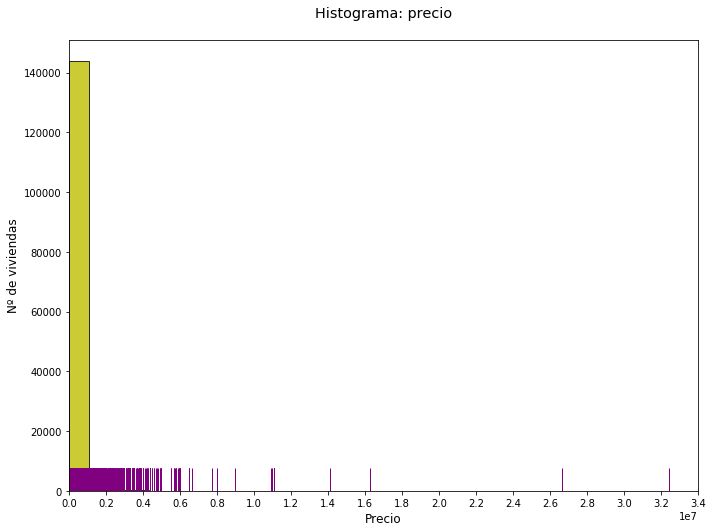

In [21]:
plt.figure(figsize = (10,7.5))
plt.hist(df['price'], bins = 30, alpha = 0.8, edgecolor='black', linewidth=1, color = 'y')
sns.rugplot(df['price'], color = 'purple')
plt.xticks(np.arange(0, 34000001, 2000000))
plt.xlim(0, 34000001)
plt.title ('Histograma: precio\n', fontsize = 'x-large')
plt.xlabel('Precio', fontsize = 'large')
plt.ylabel('Nº de viviendas', fontsize = 'large')
plt.tight_layout()

In [22]:
print('La media del precio es:', np.mean(df['price']), '\n')
print('El desvío estándar del precio es:', np.std(df['price']), '\n')
print('La mediana del precio es:', df['price'].median(), '\n')
print('El valor máximo del precio es:', np.max(df['price']),  '\n')
print('El valor mínimo del precio es:', np.min(df['price']),  '\n')

print('Otras medidas de estadística descriptiva de la variable son:')
df['price'].describe()

La media del precio es: 241221.08019909996 

El desvío estándar del precio es: 318518.37545692734 

La mediana del precio es: 166000.0 

El valor máximo del precio es: 32434232.0 

El valor mínimo del precio es: 5500.0 

Otras medidas de estadística descriptiva de la variable son:


count    1.466600e+05
mean     2.412211e+05
std      3.185195e+05
min      5.500000e+03
25%      1.110000e+05
50%      1.660000e+05
75%      2.650000e+05
max      3.243423e+07
Name: price, dtype: float64

La media es de 241221.08 ± 318518.38. Al observar la existencia de datos "atípicos", se puede obtener el valor de la mediana que es de 166000.0. El parámetro 'rug' marca los lugares donde hay información (aunque no se vean barras en el histograma), y esto nos permite observar que haya vivendas con mayor precio.

**Latitud (lat)**

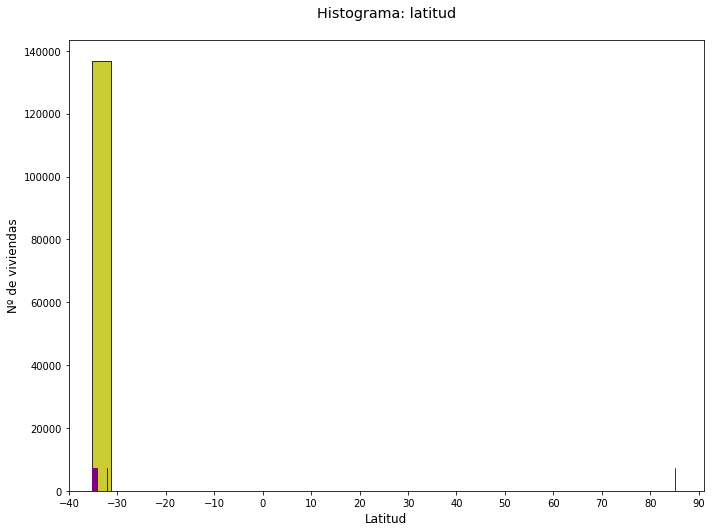

In [23]:
plt.figure(figsize = (10,7.5))
plt.hist(df['lat'][~np.isnan(df['lat'])], bins = 30, alpha = 0.8, edgecolor='black', linewidth=1, color = 'y')
sns.rugplot(df['lat'], color = 'purple')
plt.xticks(np.arange(-40, 91, 10))
plt.xlim(-40, 91)
plt.title ('Histograma: latitud\n', fontsize = 'x-large')
plt.xlabel('Latitud', fontsize = 'large')
plt.ylabel('Nº de viviendas', fontsize = 'large')
plt.tight_layout()

In [24]:
print('La media de la latitud es:', np.mean(df['lat']), '\n')
print('El desvío estándar de la latitud es:', np.std(df['lat']), '\n')
print('El valor máximo de la latitud es:', np.max(df['lat']),  '\n')
print('El valor mínimo de la latitud es:', np.min(df['lat']), '\n')

print('Otras medidas de estadística descriptiva de la variable son:')
df['lat'].describe()

La media de la latitud es: -34.604896326526124 

El desvío estándar de la latitud es: 0.46842676687639667 

El valor máximo de la latitud es: 85.0511287798 

El valor mínimo de la latitud es: -35.318457 

Otras medidas de estadística descriptiva de la variable son:


count    136735.000000
mean        -34.604896
std           0.468428
min         -35.318457
25%         -34.627667
50%         -34.600943
75%         -34.574600
max          85.051129
Name: lat, dtype: float64

La media es de -34.6 ± 0.47. El parámetro 'rug' marca los lugares donde hay información (aunque no se vean barras en el histograma), y esto nos permite observar que haya vivendas con otra latitud.

**Longitud (lon)**

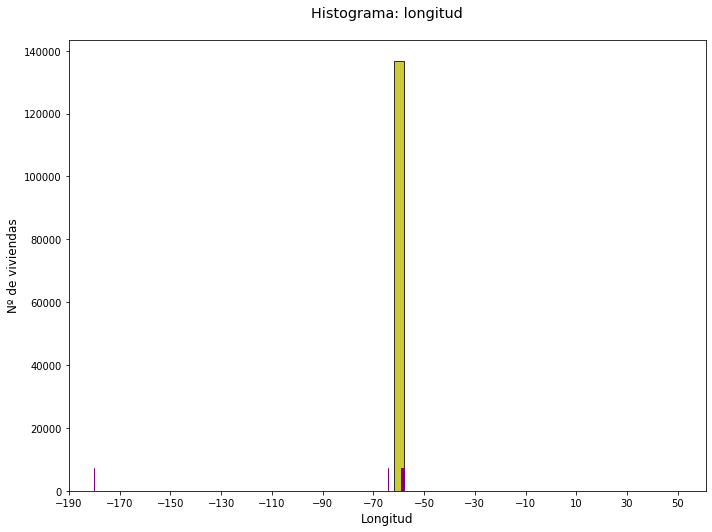

In [25]:
plt.figure(figsize = (10,7.5))
plt.hist(df['lon'][~np.isnan(df['lon'])], bins = 30, alpha = 0.8, edgecolor='black', linewidth=1, color = 'y')
sns.rugplot(df['lon'], color = 'purple')
plt.xticks(np.arange(-190, 61, 20))
plt.xlim(-190, 61)
plt.title ('Histograma: longitud\n', fontsize = 'x-large')
plt.xlabel('Longitud', fontsize = 'large')
plt.ylabel('Nº de viviendas', fontsize = 'large')
plt.tight_layout()

In [26]:
print('La media de la longitud es:', np.mean(df['lon']),'\n')
print('El desvío estándar de la longitud es:', np.std(df['lon']), '\n')
print('El valor máximo de la longitud es:', np.max(df['lon']), '\n')
print('El valor mínimo de la longitud es:', np.min(df['lon']), '\n')

print('Otras medidas de estadística descriptiva de la variable son:')
df['lon'].describe()

La media de la longitud es: -58.4653036762513 

El desvío estándar de la longitud es: 0.4861880995562568 

El valor máximo de la longitud es: -57.805831895299995 

El valor mínimo de la longitud es: -180.0 

Otras medidas de estadística descriptiva de la variable son:


count    136701.000000
mean        -58.465304
std           0.486190
min        -180.000000
25%         -58.504012
50%         -58.443262
75%         -58.407586
max         -57.805832
Name: lon, dtype: float64

La media es de -58.47 ± 0.49. El parámetro 'rug' marca los lugares donde hay información (aunque no se vean barras en el histograma), y esto nos permite observar que haya vivendas con otra longitud.

**¿Qué más se podría hacer con las variables latitud (lat) y longitud (lon)?**


Se podría utilizar el dataset para marcar las propiedades en el mapa. **Ver desafío 2.1**

## Variables categóricas

- Realicé gráfico de barra sobre las variables: tipo de propiedad (property_type), país (l1), zonas (l2), barrios o ciudades (l3), tipo de operación (operation_type) y moneda (currecy).

**Tipo de propiedad (property type)**

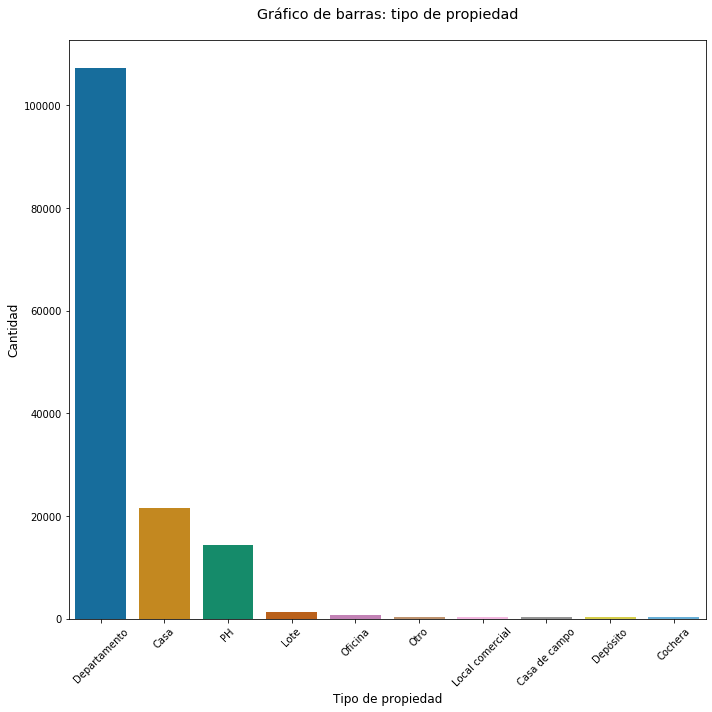

In [27]:
plt.figure(figsize = (10,10))
sns.countplot(data = df, x = "property_type", order = df['property_type'].value_counts().index, palette= 'colorblind')
plt.title ('Gráfico de barras: tipo de propiedad\n', fontsize = 'x-large')
plt.xlabel('Tipo de propiedad', fontsize = 'large')
plt.ylabel('Cantidad', fontsize = 'large')
plt.xticks(rotation = 45)
plt.tight_layout()

Los principales tipos de propiedades son: departamentos, casas y PH.

**Pais (l1)**

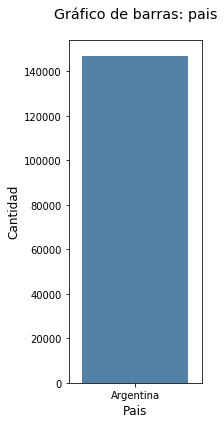

In [28]:
plt.figure(figsize = (3,6))
sns.countplot(data = df, x = "l1", color = 'steelblue')
plt.title ('Gráfico de barras: pais\n',  fontsize = 'x-large')
plt.xlabel('Pais', fontsize = 'large')
plt.ylabel('Cantidad', fontsize = 'large')
plt.tight_layout()

Las propiedades se ubican solo en Argentina.

**Zonas (l2)**

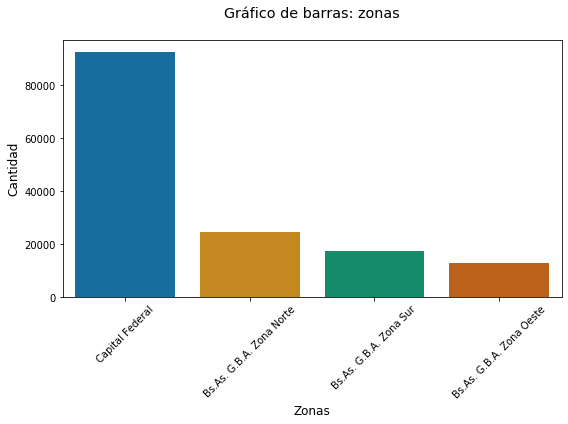

In [29]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "l2", order = df['l2'].value_counts().index, palette = 'colorblind')
plt.xticks(rotation = 45)
plt.title ('Gráfico de barras: zonas\n', fontsize = 'x-large')
plt.xlabel('Zonas', fontsize = 'large')
plt.ylabel('Cantidad', fontsize = 'large')
plt.tight_layout()

Las propiedades se encuentran en las zonas de Capital Federal, Bs.As. G.B.A. Zona Norte, Bs.As. G.B.A. Zona Sur y Bs.As. G.B.A. Zona Oeste.

**Barrios (l3)**

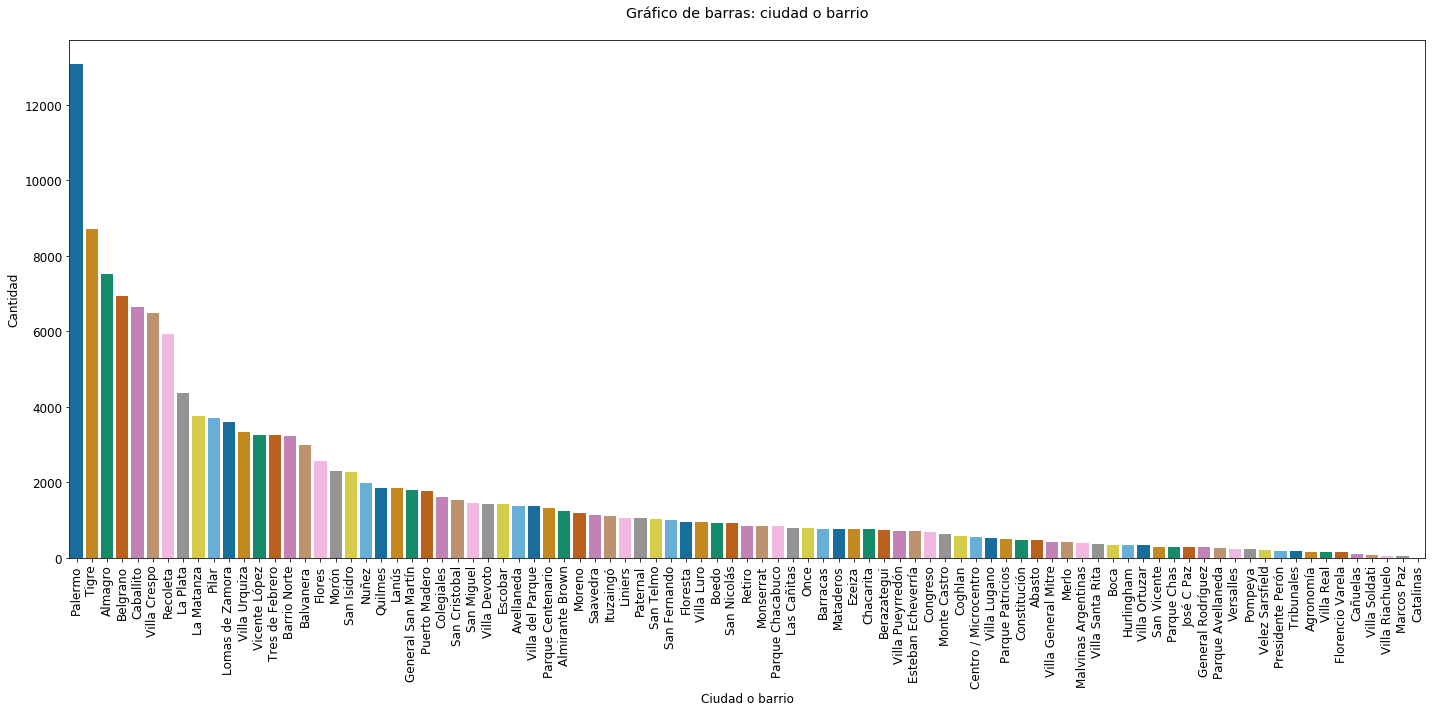

In [30]:
plt.figure(figsize = (20,10))
sns.countplot(data = df, x = "l3", order = df['l3'].value_counts().index, palette = 'colorblind')
plt.xticks(rotation = 90, fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.title ('Gráfico de barras: ciudad o barrio\n', fontsize = 'x-large')
plt.xlabel ('Ciudad o barrio', fontsize = 'large')
plt.ylabel('Cantidad', fontsize = 'large')
plt.tight_layout()

Las propiedades se encuentran en varios barrios o ciudades. Los 5 que tienen mas cantidad de propiedades son: Palermo, Tigre, Almagro, Belgrano y Caballito. 

**Tipo de operación (operation_type)**

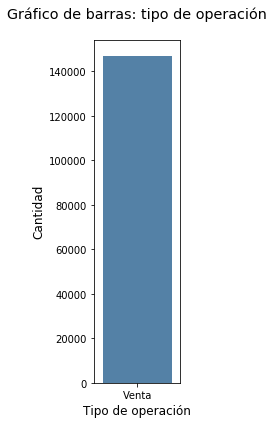

In [31]:
plt.figure(figsize = (3,6))
sns.countplot(data = df, x = 'operation_type', color = 'steelblue')
plt.title ('Gráfico de barras: tipo de operación\n',  fontsize = 'x-large')
plt.xlabel('Tipo de operación', fontsize = 'large')
plt.ylabel('Cantidad', fontsize = 'large')
plt.tight_layout()

El único tipo de operación sobre las propiedades es la venta.

**Moneda (currency)**

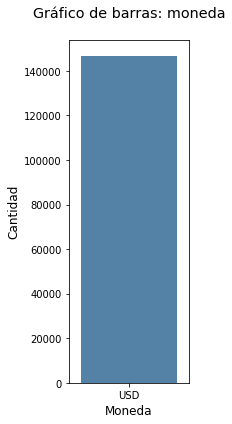

In [32]:
plt.figure(figsize = (3,6))
sns.countplot(data = df, x = 'currency', color = 'steelblue')
plt.title ('Gráfico de barras: moneda\n', fontsize = 'x-large')
plt.xlabel ('Moneda', fontsize = 'large')
plt.ylabel('Cantidad', fontsize = 'large')
plt.tight_layout()

El único tipo de moneda es dólares (USD).

**¿Por que no usé las otras variables categóricas?**

No las usé debido a que consideraba que no me ofrecían mucha información, en el formato en que se encontraban cargados.

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [33]:
df.pivot_table(index=['property_type'], aggfunc='size')

property_type
Casa                21521
Casa de campo         322
Cochera               259
Departamento       107326
Depósito              265
Local comercial       325
Lote                 1312
Oficina               658
Otro                  374
PH                  14298
dtype: int64

En total hay 10 tipos de propiedades: Casa, casa de campo, cochera, departamento, depósito, local comercial, lote, oficina, PH y otro. La tabla de arriba indica el número de propiedades por cada tipo.

Esto mismo se puede observar en el gráfico de barras a continuación:

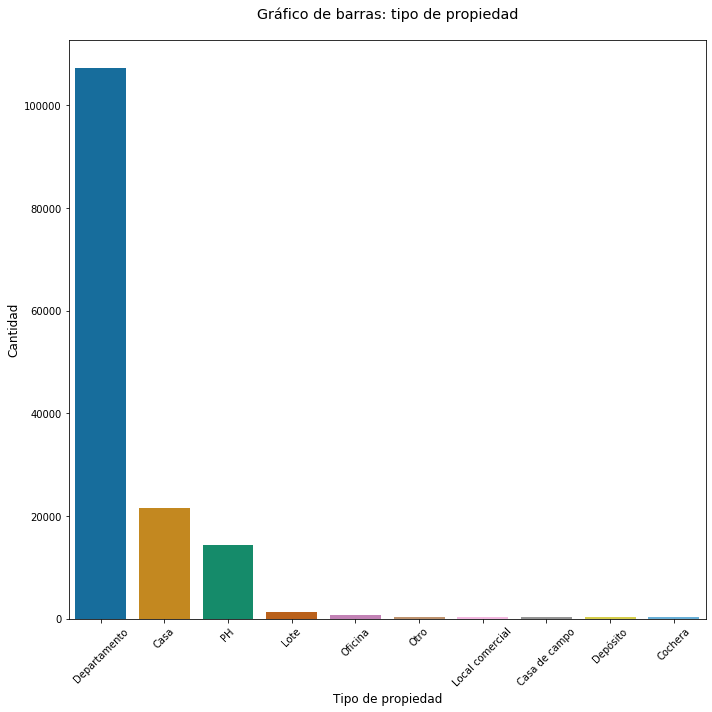

In [34]:
plt.figure(figsize = (10,10))
sns.countplot(data = df, x = "property_type", order = df['property_type'].value_counts().index, palette = 'colorblind')
plt.title ('Gráfico de barras: tipo de propiedad\n', fontsize = 'x-large')
plt.xlabel('Tipo de propiedad', fontsize = 'large')
plt.ylabel('Cantidad', fontsize = 'large')
plt.xticks(rotation = 45)
plt.tight_layout()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

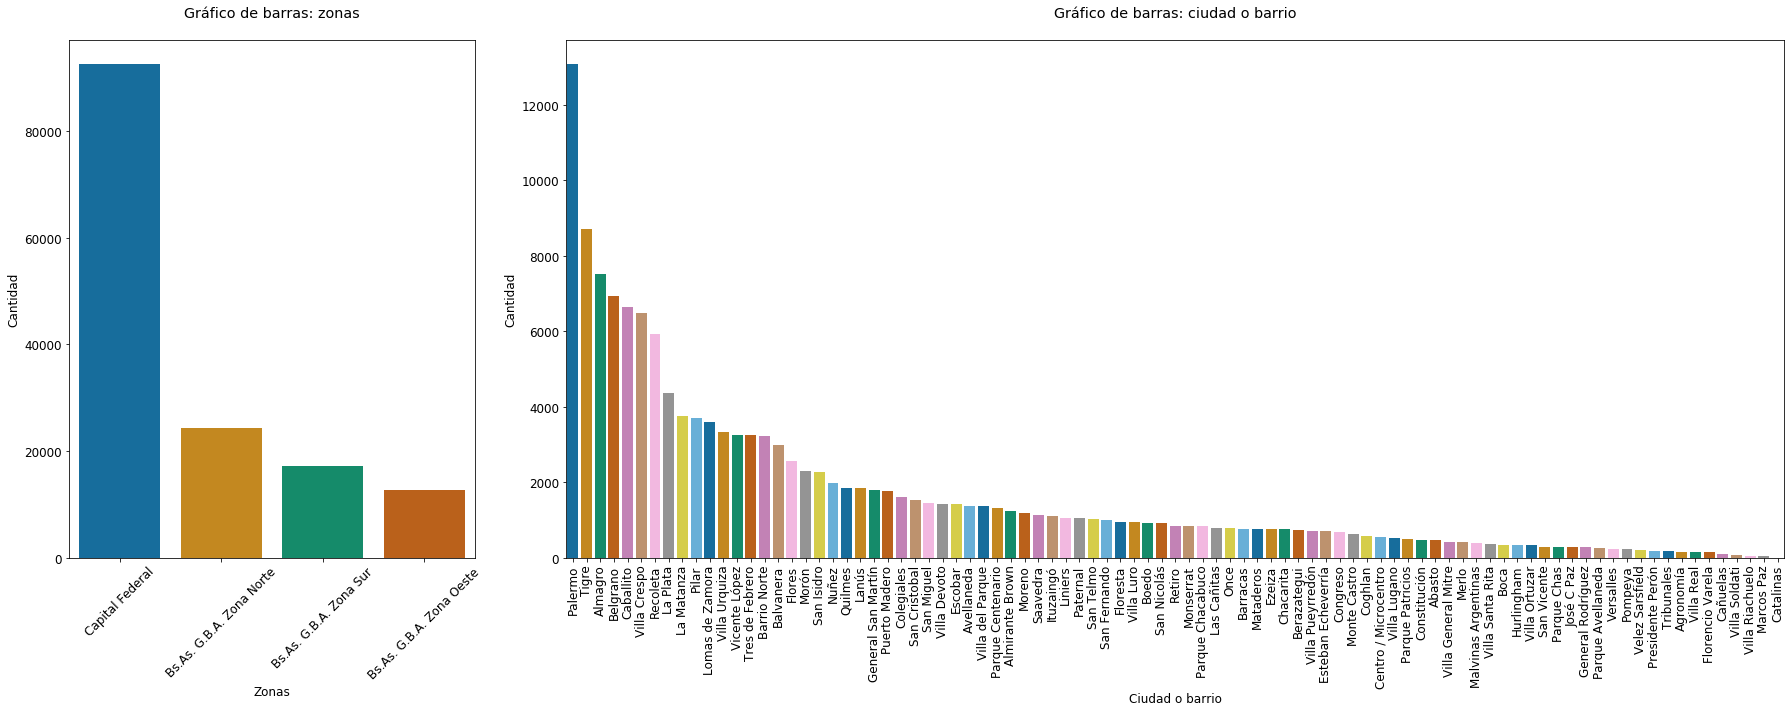

In [35]:
plt.figure(figsize = (25,10))

gs = gridspec.GridSpec(1, 2,width_ratios=[1,3])

ax1 = plt.subplot(gs[0])
sns.countplot(data = df, x = "l2", order = df['l2'].value_counts().index, palette = 'colorblind')
plt.xticks(rotation = 45, fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.title ('Gráfico de barras: zonas\n', fontsize = 'x-large')
plt.xlabel('Zonas', fontsize = 'large')
plt.ylabel('Cantidad', fontsize = 'large')

ax2 = plt.subplot(gs[1])
sns.countplot(data = df, x = "l3", order = df['l3'].value_counts().index, palette = 'colorblind')
plt.xticks(rotation = 90, fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.title ('Gráfico de barras: ciudad o barrio\n', fontsize = 'x-large')
plt.xlabel('Ciudad o barrio', fontsize = 'large')
plt.ylabel('Cantidad', fontsize = 'large')

plt.tight_layout()

Las propiedades en su mayoría son de Capital Federal, seguido por Bs.As. G.B.A. Zona Norte,  Bs.As. G.B.A. Zona Sur y Bs.As. G.B.A. Zona Oeste.

Los barrios o ciudades con mayor cantidad de propiedades son: Palermo, Tigre, Almagro, Belgrano, Caballito, Villa Crespo, entre otros.

Se puede visualizar los 10 barrios/ciudades con mas propiedades en la tabla de abajo:

In [36]:
barrios_mas_propiedades = df.pivot_table(index=['l3'], aggfunc='size')
barrios_mas_propiedades = barrios_mas_propiedades.sort_values(ascending=False)
barrios_mas_propiedades.head(10)

l3
Palermo         13073
Tigre            8718
Almagro          7527
Belgrano         6935
Caballito        6650
Villa Crespo     6494
Recoleta         5917
La Plata         4354
La Matanza       3757
Pilar            3709
dtype: int64

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [37]:
df_select = df.loc[((df['property_type'] == 'Departamento') |
                   (df['property_type'] == 'Casa') |
                   (df['property_type'] == 'PH')) & 
                   (df['l2'] == 'Capital Federal')]
df_select.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

A. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?

In [38]:
df_select = df_select.loc [:, ['property_type','rooms', 'bedrooms', 'bathrooms', 'surface_total',
                               'surface_covered','price']] 
df_select.shape

(91485, 7)

In [39]:
df_select.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Los valores máximos de ambientes, habitaciones y baños parecen ser elevados. En el caso de superficie total, los valores mínimos y máximos parecen no ser adecuados. Lo mismo sucede para superficie cubierta. El precio máximo parece ser excesivo.

**B. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.**

**C. Lo mismo ocurre con valores de superficie total muy chico.**

**D. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias**

**General (superficie total)**

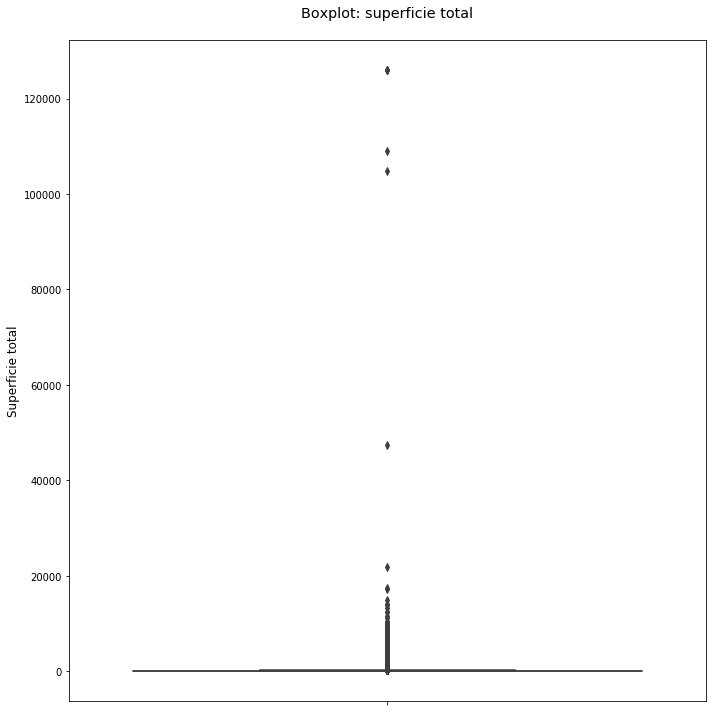

In [40]:
#Boxplot para superficie total con la variable tal cual
plt.figure(figsize = (10,10))
sns.boxplot(data = df_select, y = 'surface_total')
plt.title ('Boxplot: superficie total\n', fontsize = 'x-large')
plt.ylabel('Superficie total', fontsize = 'large')
plt.tight_layout()

In [41]:
#Elimino los casos donde la superficie cubierta > superficie total
df_select = df_select[~((df_select['surface_covered'] > df_select['surface_total']))]

Para la determinación de los valores atípicos, usaré el **método de Tukey**.

Es el método más utilizado académicamente por su sencillez y resultados y toma como referencia la diferencia entre el primer cuartil (Q1) y el tercer cuartil (Q3), o rango intercuartílico (IQR). 

En un diagrama de caja se considera un valor atípico el que se encuentra 1.5 veces esa distancia de uno de esos cuartiles (atípico leve) o a 3 veces esa distancia (atípico extremo).

Para resolver esta sección, utilizaré 1.5 (atípico leve).

In [42]:
#Utilizo el IQR para filtrar valores atípicos y tener un gráfico mas interpretable
Q1 = np.nanpercentile(df_select['surface_total'],25)
Q3 = np.nanpercentile(df_select['surface_total'],75)
IQR_st = Q3 - Q1
print(IQR_st)

df_select = df_select[~ ((df_select['surface_total'] <(Q1- 1.5 * IQR_st)) | 
                         (df_select['surface_total']> (Q3 + 1.5 * IQR_st)))] 

62.0


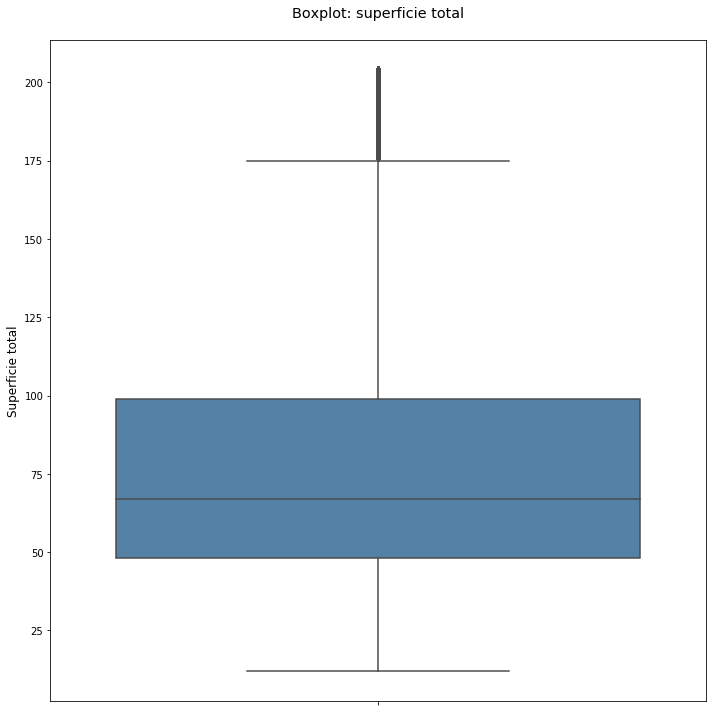

In [43]:
#Grafico nuevamente el boxplot
plt.figure(figsize = (10,10))
sns.boxplot(data = df_select, y = 'surface_total', color = 'steelblue')
plt.title ('Boxplot: superficie total\n', fontsize = 'x-large')
plt.ylabel('Superficie total', fontsize = 'large')
plt.tight_layout()

**E. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.**

**General (precio)**

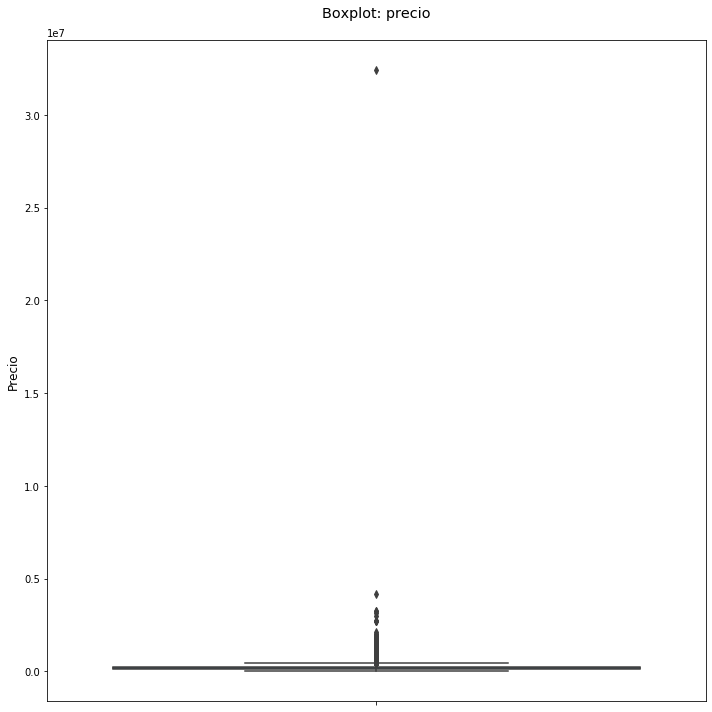

In [44]:
#Boxplot para precio con la variable tal cual
plt.figure(figsize = (10,10))
sns.boxplot(data = df_select, y = 'price')
plt.title ('Boxplot: precio\n', fontsize = 'x-large')
plt.ylabel('Precio', fontsize = 'large')
plt.tight_layout()

In [45]:
#Utilizo el IQR para filtrar valores atípicos y tener un gráfico mas interpretable
Q1 = np.nanpercentile(df_select['price'],25)
Q3 = np.nanpercentile(df_select['price'],75)
IQR_p = Q3 - Q1
print(IQR_p)

df_select = df_select[~ ((df_select['price'] <(Q1- 1.5 * IQR_p)) | 
                         (df_select['price']> (Q3 + 1.5 * IQR_p)))] 

131000.0


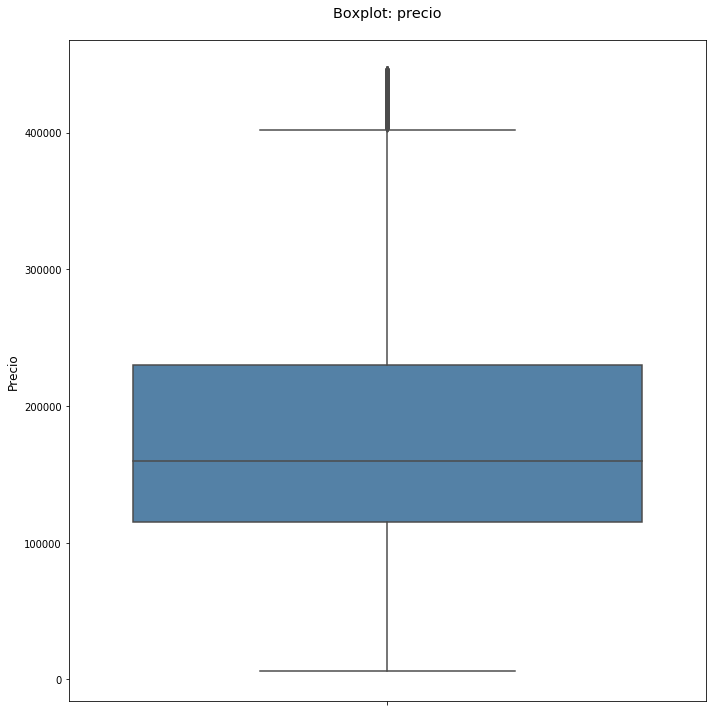

In [46]:
#Grafico nuevamente el boxplot
plt.figure(figsize = (10,10))
sns.boxplot(data = df_select, y = 'price', color = 'steelblue')
plt.title ('Boxplot: precio\n', fontsize = 'x-large')
plt.ylabel('Precio', fontsize = 'large')
plt.tight_layout()

 **F. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.**

In [47]:
df_select.shape

(78930, 7)

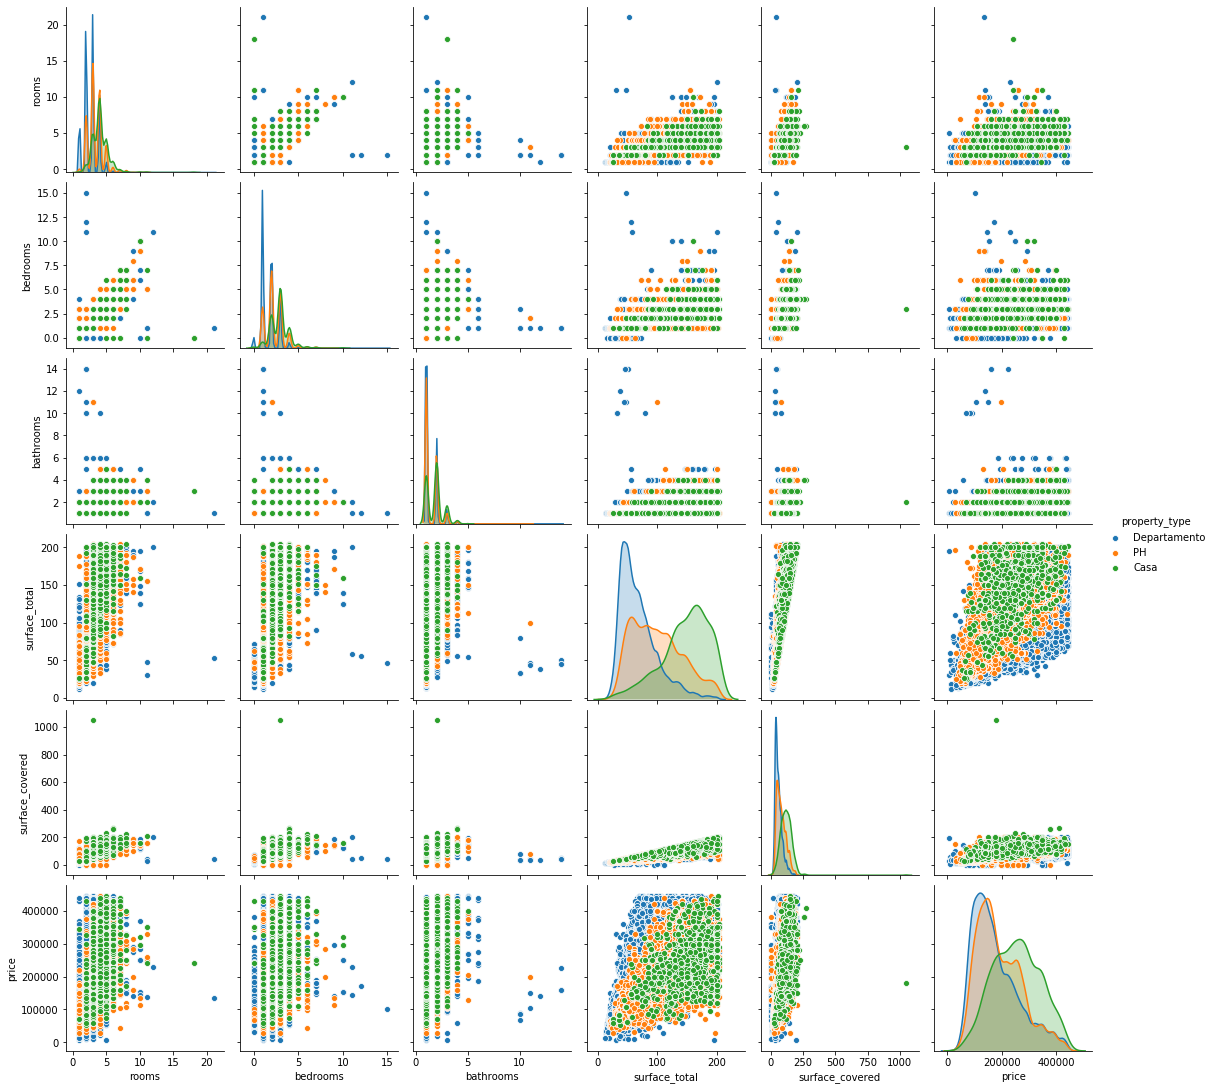

In [48]:
#Grafico el pairplot
sns.pairplot(df_select, hue = 'property_type') 

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

**Evaluo correlación con precio sin diferenciar el tipo de propiedad**

In [49]:
#Coeficiente de correlación de Pearson sin diferenciar por tipo de propiedad
df_select.corr() #Por default method = 'pearson'

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.931652,0.507943,0.752459,0.794919,0.596636
bedrooms,0.931652,1.000000,0.509113,0.736031,0.785092,0.578454
bathrooms,0.507943,0.509113,1.000000,0.572873,0.604925,0.599558
surface_total,0.752459,0.736031,0.572873,1.000000,0.920555,0.720236
surface_covered,0.794919,0.785092,0.604925,0.920555,1.000000,0.727771
price,0.596636,0.578454,0.599558,0.720236,0.727771,1.000000


**Las variables que mas se correlacionan son:** 

-ambientes y habitaciones: 0.93

-superficie cubierta y superficie total: 0.92

**Siguen:**

-superficie cubierta y ambientes: 0.79

-superficie cubierta y habitaciones: 0.79

-superficie total y ambientes: 0.75

-superficie total y habitaciones: 0.74

**La mejores variables para predecir el precio son:**

-superficie cubierta (correlación de 0.73)

-superficie total (correlación de 0.72)

**Evalúo correlación con precio por cada tipo de propiedad**

In [50]:
#Coeficiente de correlación de Pearson por tipo de propiedad #Por default method = 'pearson'
df_select.groupby('property_type')[['rooms','bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].corr() 

rooms  bedrooms  bathrooms  surface_total  \
property_type                                                                 
Casa          rooms            1.000000  0.659826   0.386536       0.502096   
              bedrooms         0.659826  1.000000   0.361544       0.449431   
              bathrooms        0.386536  0.361544   1.000000       0.266620   
              surface_total    0.502096  0.449431   0.266620       1.000000   
              surface_covered  0.396052  0.387280   0.293936       0.799881   
              price            0.304714  0.309166   0.420511       0.478568   
Departamento  rooms            1.000000  0.931228   0.516321       0.752489   
              bedrooms         0.931228  1.000000   0.520500       0.740123   
              bathrooms        0.516321  0.520500   1.000000       0.618456   
              surface_total    0.752489  0.740123   0.618456       1.000000   
              surface_covered  0.800116  0.790275   0.636151       0.934199   
              price            0.608576  0.587645   0.608184       0.772576   
PH            rooms            1.000000  0.941140   0.463323       0.661853   
              bedrooms         0.941140  1.000000   0.450512       0.634776   
              bathrooms        0.463323  0.450512   1.000000       0.462358   
              surface_total    0.661853  0.634776   0.462358       1.000000   
              surface_covered  0.745433  0.738570   0.545283       0.833225   
              price            0.555826  0.549391   0.522258       0.639041   

                               surface_covered     price  
property_type                                             
Casa          rooms                   0.396052  0.304714  
              bedrooms                0.387280  0.309166  
              bathrooms               0.293936  0.420511  
              surface_total           0.799881  0.478568  
              surface_covered         1.000000  0.338708  
              price                   0.338708  1.000000  
Departamento  rooms                   0.800116  0.608576  
              bedrooms                0.790275  0.587645  
              bathrooms               0.636151  0.608184  
              surface_total           0.934199  0.772576  
              surface_covered         1.000000  0.764122  
              price                   0.764122  1.000000  
PH            rooms                   0.745433  0.555826  
              bedrooms                0.738570  0.549391  
              bathrooms               0.545283  0.522258  
              surface_total           0.833225  0.639041  
              surface_covered         1.000000  0.700238  
              price                   0.700238  1.000000

Para predecir la variable precio, hay variaciones de acuerdo al tipo de propiedad:

-CASA: superficie total (0.48) y baños (0.42)

-Departamento: superficie total (0.78) y superficie cubierta (0.76)

-PH: superficie cubierta (0.70) y superficie total (0.64)

Para CASA y DEPARTAMENTO la variable mas correlacionada con precio fue SUPERFICIE TOTAL, y para el caso de PH fue SUPERFICIE CUBIERTA.

**Me pregunté sobre la posibilidad de filtrar el dataset por la superficie total y precio pero por tipo de propiedad, ya que varían en sus valores atípicos (ver boxplot). ¿Varían las correlaciones entre las variables? ¿Varían las correlaciones con la variable precio? ¿Varían las correlaciones con la variable precio de acuerdo al tipo de propiedad?**

In [51]:
df_select_2 = df.loc[((df['property_type'] == 'Departamento') |
                   (df['property_type'] == 'Casa') |
                   (df['property_type'] == 'PH')) & 
                   (df['l2'] == 'Capital Federal')]
df_select_2.shape

(91485, 19)

In [52]:
df_select_2 = df_select_2.loc [:, ['property_type','rooms', 'bedrooms', 'bathrooms', 'surface_total',
                                   'surface_covered','price']] 
df_select_2.shape

(91485, 7)

**Boxplot de las variables superficie total y precio tal cual para cada tipo de propiedad**

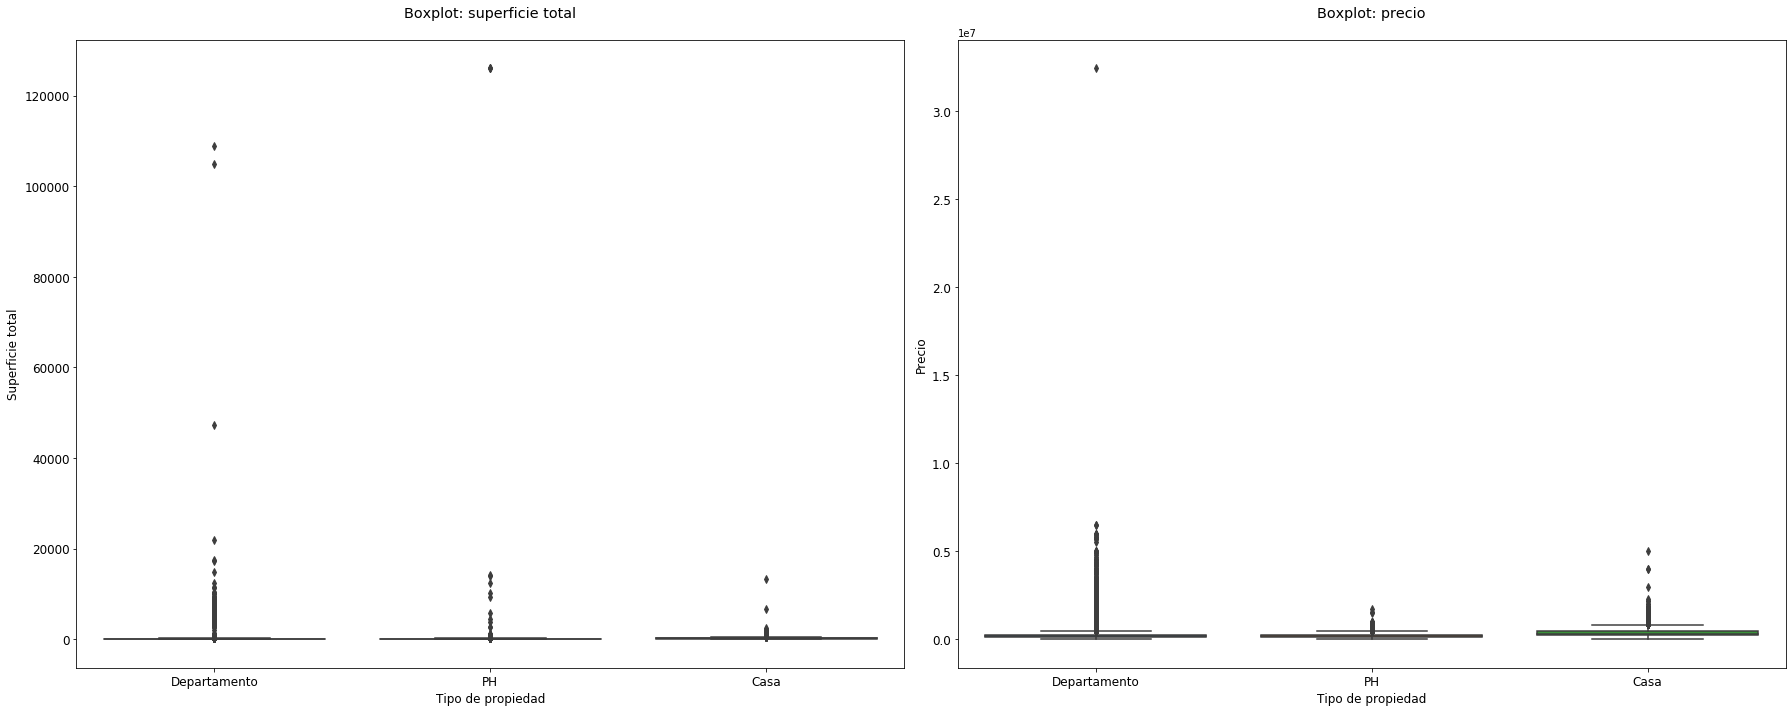

In [53]:
plt.figure(figsize = (25,10))

gs = gridspec.GridSpec(1, 2,width_ratios=[1,1])

ax1 = plt.subplot(gs[0])
sns.boxplot(data = df_select_2, x = 'property_type', y = 'surface_total')
plt.title ('Boxplot: superficie total\n', fontsize = 'x-large')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.xlabel('Tipo de propiedad', fontsize = 'large')
plt.ylabel('Superficie total', fontsize = 'large')

ax2 = plt.subplot(gs[1])
sns.boxplot(data = df_select_2, x = 'property_type', y = 'price')
plt.title ('Boxplot: precio\n', fontsize = 'x-large')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.xlabel('Tipo de propiedad', fontsize = 'large')
plt.ylabel('Precio', fontsize = 'large')

plt.tight_layout()

**CASA**

In [54]:
#CASA
#Elimino los casos donde la superficie cubierta > superficie total
df_select_casa = df_select_2.loc[(df_select_2['property_type'] == 'Casa') &
                               (df_select_2['surface_total'] >= df_select_2['surface_covered'])]

In [55]:
#Utilizo el IQR para filtrar valores atípicos de superficie total y tener un gráfico mas interpretable
Q1 = np.nanpercentile(df_select_casa['surface_total'],25)
Q3 = np.nanpercentile(df_select_casa['surface_total'],75)
IQR_st_casa = Q3 - Q1
print(IQR_st_casa)

170.5


In [56]:
df_select_casa = df_select_casa[~((df_select_casa['surface_total'] < (Q1 - 1.5 * IQR_st_casa)) |
                                  (df_select_casa['surface_total'] > (Q3 + 1.5 * IQR_st_casa)))] 
df_select_casa.shape

(1954, 7)

In [57]:
#Utilizo el IQR para filtrar valores atípicos de precio y tener un gráfico mas interpretable
Q1 = np.nanpercentile(df_select_casa['price'],25)
Q3 = np.nanpercentile(df_select_casa['price'],75)
IQR_p_casa = Q3 - Q1
print(IQR_p_casa)

219750.0


In [58]:
df_select_casa = df_select_casa[~ ((df_select_casa['price'] <(Q1- 1.5 * IQR_p_casa)) | 
                                   (df_select_casa['price']> (Q3 + 1.5 * IQR_p_casa)))] 
df_select_casa.shape

(1868, 7)

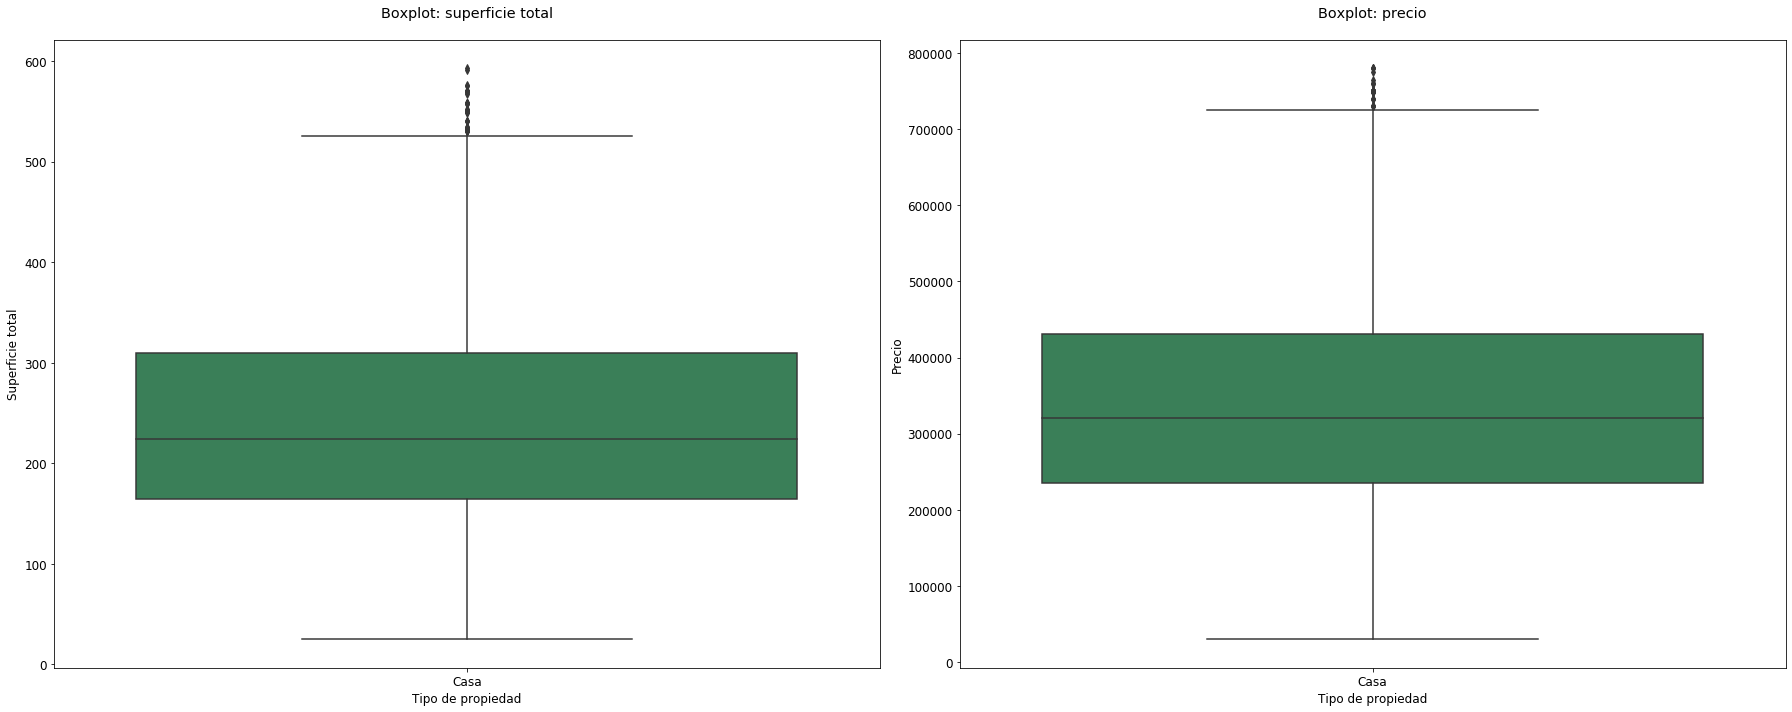

In [59]:
#Grafico nuevamente los boxplot con los filtros aplicados
plt.figure(figsize = (25,10))

gs = gridspec.GridSpec(1, 2,width_ratios=[1,1])

ax1 = plt.subplot(gs[0])
sns.boxplot(data = df_select_casa, x = 'property_type', y = 'surface_total', color = 'seagreen')
plt.title ('Boxplot: superficie total\n', fontsize = 'x-large')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.xlabel('Tipo de propiedad', fontsize = 'large')
plt.ylabel('Superficie total', fontsize = 'large')


ax2 = plt.subplot(gs[1])
sns.boxplot(data = df_select_casa, x = 'property_type', y = 'price', color = 'seagreen')
plt.title ('Boxplot: precio\n', fontsize = 'x-large')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.xlabel('Tipo de propiedad', fontsize = 'large')
plt.ylabel('Precio', fontsize = 'large')

plt.tight_layout()

In [60]:
df_select_casa.shape

(1868, 7)

In [61]:
#DEPARTAMENTO
#Elimino los casos donde la superficie cubierta > superficie total
df_select_depto = df_select_2.loc[(df_select_2['property_type'] == 'Departamento') &
                                (df_select_2['surface_total'] >= df_select_2['surface_covered'])] 

In [62]:
#Utilizo el IQR para filtrar valores atípicos de superficie total y tener un gráfico mas interpretable
Q1 = np.nanpercentile(df_select_depto['surface_total'],25)
Q3 = np.nanpercentile(df_select_depto['surface_total'],75)
IQR_st_depto = Q3 - Q1
print(IQR_st_depto)

51.0


In [63]:
df_select_depto = df_select_depto[~((df_select_depto['surface_total'] < (Q1 - 1.5 * IQR_st_depto)) | 
                                    (df_select_depto['surface_total'] > (Q3 + 1.5 * IQR_st_depto)))] 
df_select_depto.shape

(64338, 7)

In [64]:
#Utilizo el IQR para filtrar valores atípicos de precio y tener un gráfico mas interpretable
Q1 = np.nanpercentile(df_select_depto['price'],25)
Q3 = np.nanpercentile(df_select_depto['price'],75)
IQR_p_depto = Q3 - Q1
print(IQR_p_depto)

126000.0


In [65]:
df_select_depto = df_select_depto[~ ((df_select_depto['price'] <(Q1- 1.5 * IQR_p_depto)) | 
                                     (df_select_depto['price']> (Q3 + 1.5 * IQR_p_depto)))] 
df_select_depto.shape

(60299, 7)

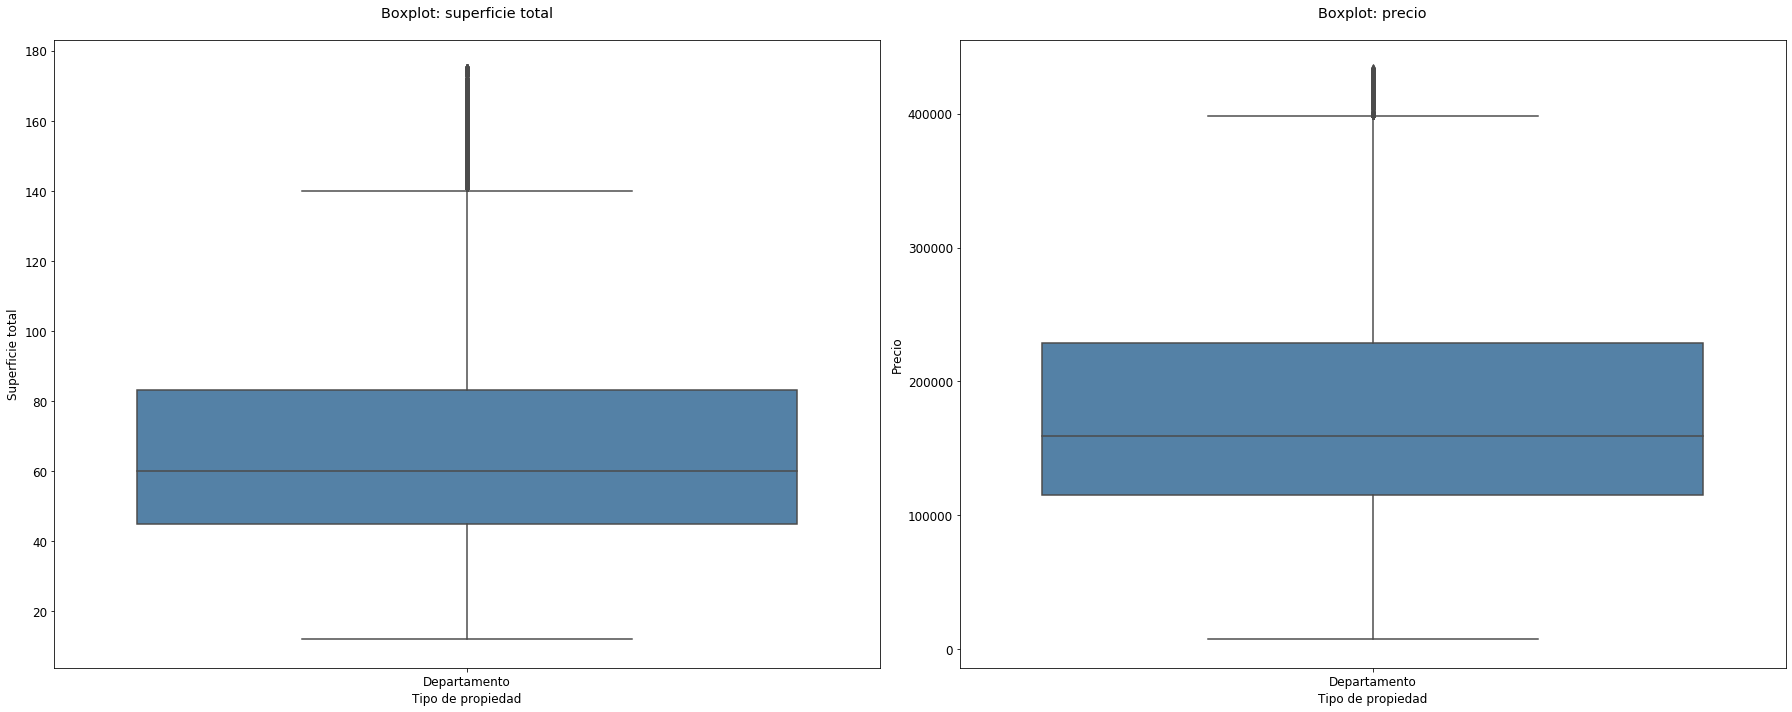

In [66]:
#Grafico nuevamente los boxplot con los filtros aplicados
plt.figure(figsize = (25,10))

gs = gridspec.GridSpec(1, 2, width_ratios=[1,1])

ax1 = plt.subplot(gs[0])
sns.boxplot(data = df_select_depto, x = 'property_type', y = 'surface_total', color = 'steelblue')
plt.title ('Boxplot: superficie total\n', fontsize = 'x-large')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.xlabel('Tipo de propiedad', fontsize = 'large')
plt.ylabel('Superficie total', fontsize = 'large')

ax2 = plt.subplot(gs[1])
sns.boxplot(data = df_select_depto, x = 'property_type', y = 'price', color = 'steelblue')
plt.title ('Boxplot: precio\n', fontsize = 'x-large')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.xlabel('Tipo de propiedad', fontsize = 'large')
plt.ylabel('Precio', fontsize = 'large')

plt.tight_layout()

In [67]:
df_select_depto.shape

(60299, 7)

In [68]:
#PH
#Elimino los casos donde la superficie cubierta > superficie total
df_select_ph= df_select_2.loc[(df_select_2['property_type'] == 'PH') &
                            (df_select_2['surface_total'] >= df_select_2['surface_covered'])]

In [69]:
#Utilizo el IQR para filtrar valores atípicos de superficie total y tener un gráfico mas interpretable
Q1 = np.nanpercentile(df_select_ph['surface_total'],25)
Q3 = np.nanpercentile(df_select_ph['surface_total'],75)
IQR_st_ph = Q3 - Q1
print(IQR_st_ph)

82.0


In [70]:
df_select_ph = df_select_ph[~((df_select_ph['surface_total'] < (Q1 - 1.5 * IQR_st_ph)) | 
                              (df_select_ph['surface_total'] > (Q3 + 1.5 * IQR_st_ph)))] 
df_select_ph.shape

(8907, 7)

In [71]:
#Utilizo el IQR para filtrar valores atípicos de precio y tener un gráfico mas interpretable
Q1 = np.nanpercentile(df_select_ph['price'],25)
Q3 = np.nanpercentile(df_select_ph['price'],75)
IQR_p_ph = Q3 - Q1
print(IQR_p_ph)

128000.0


In [72]:
df_select_ph = df_select_ph[~ ((df_select_ph['price'] <(Q1- 1.5 * IQR_p_ph)) | 
                               (df_select_ph['price']> (Q3 + 1.5 * IQR_p_ph)))] 
df_select_ph.shape

(8751, 7)

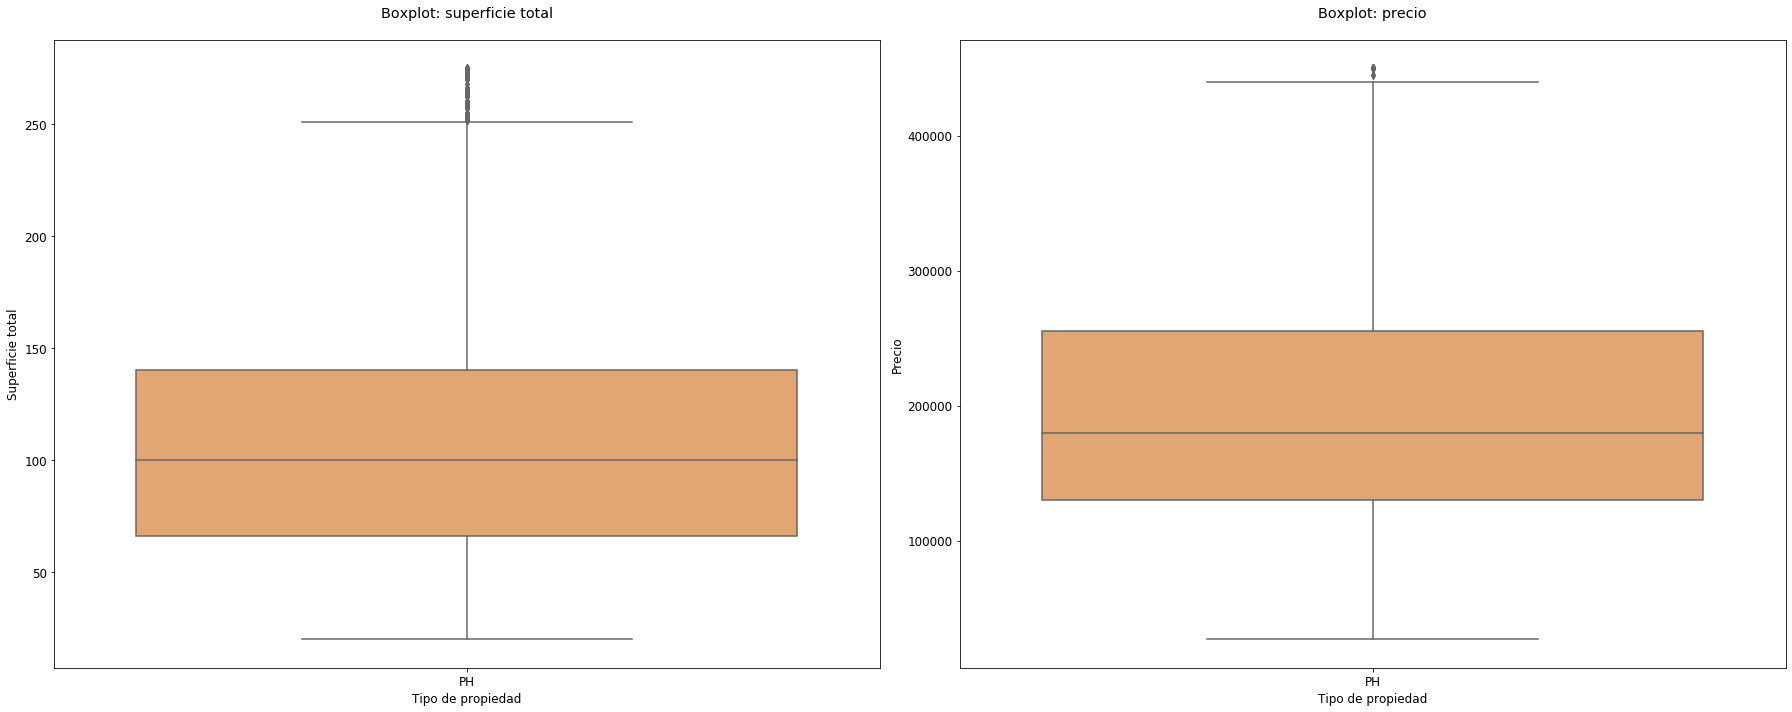

In [73]:
#Grafico nuevamente los boxplot con los filtros aplicados
plt.figure(figsize = (25,10))

gs = gridspec.GridSpec(1, 2, width_ratios=[1,1])

ax1 = plt.subplot(gs[0])
sns.boxplot(data = df_select_ph, x = 'property_type', y = 'surface_total', color = 'sandybrown')
plt.title ('Boxplot: superficie total\n', fontsize = 'x-large')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.xlabel('Tipo de propiedad', fontsize = 'large')
plt.ylabel('Superficie total', fontsize = 'large')

ax2 = plt.subplot(gs[1])
sns.boxplot(data = df_select_ph, x = 'property_type', y = 'price', color = 'sandybrown')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.title ('Boxplot: precio\n', fontsize = 'x-large')
plt.xlabel('Tipo de propiedad', fontsize = 'large')
plt.ylabel('Precio', fontsize = 'large')

plt.tight_layout()

In [74]:
df_select_ph.shape

(8751, 7)

In [75]:
#Genero mi nuevo dataframe concatenando los dataframes generados por tipo de propiedad
df_filtrado = pd.concat([df_select_casa, df_select_depto, df_select_ph], axis=0)
df_filtrado.shape

(70918, 7)

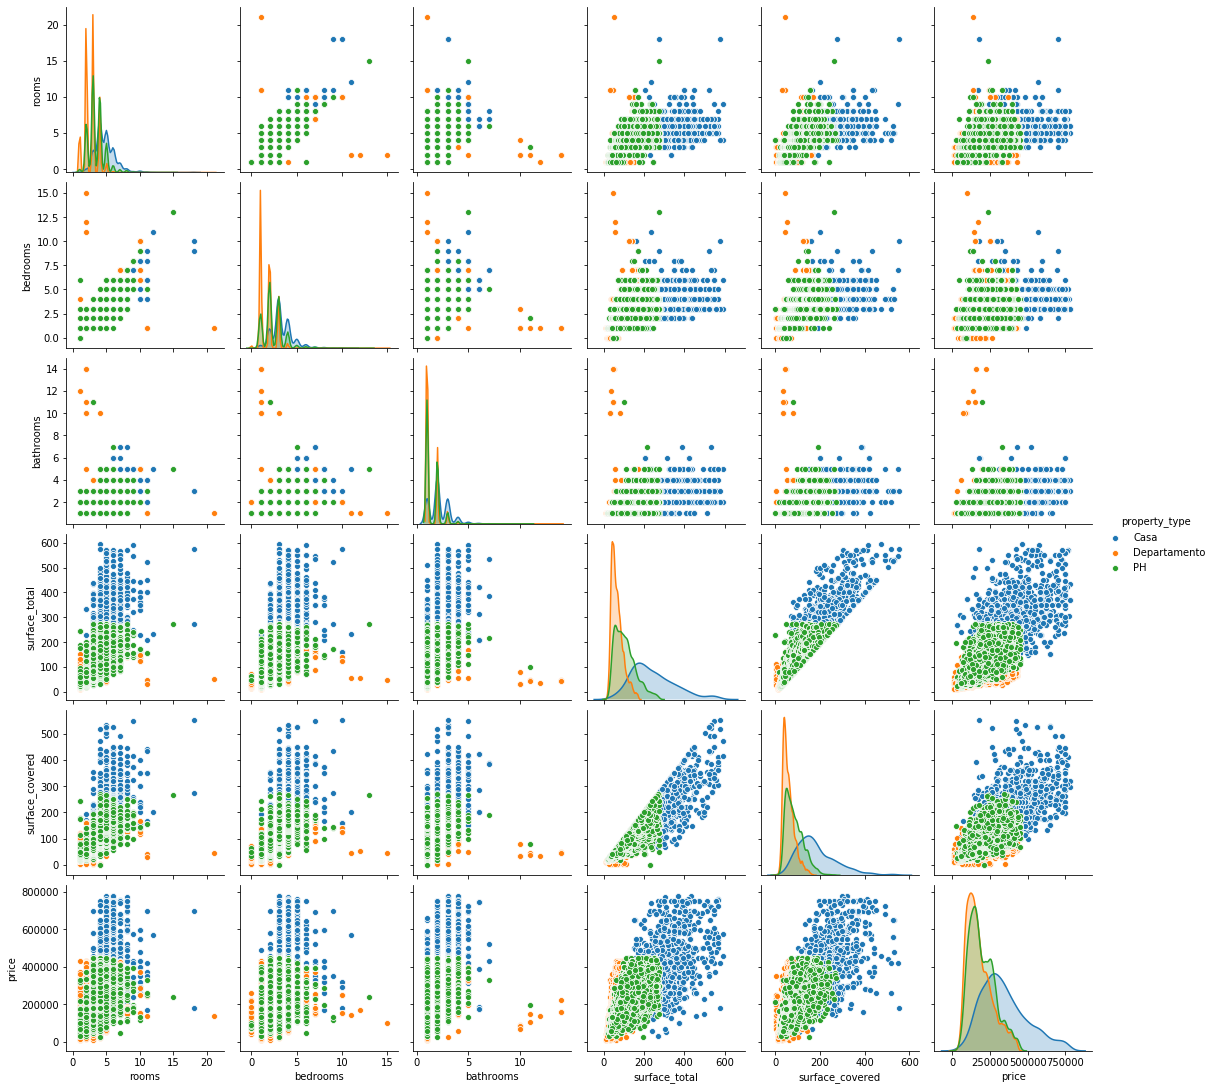

In [76]:
#Grafico el pairplot
sns.pairplot(df_filtrado, hue = 'property_type') 

**Evalúo correlación con precio sin diferenciar el tipo de propiedad**

In [77]:
#Coeficiente de correlación de Pearson sin diferenciar por tipo de propiedad
df_filtrado.corr() #Por default method = 'pearson'

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.931849,0.525546,0.715867,0.772716,0.601855
bedrooms,0.931849,1.000000,0.529324,0.693396,0.755677,0.578945
bathrooms,0.525546,0.529324,1.000000,0.550144,0.599686,0.605122
surface_total,0.715867,0.693396,0.550144,1.000000,0.928290,0.704394
surface_covered,0.772716,0.755677,0.599686,0.928290,1.000000,0.734648
price,0.601855,0.578945,0.605122,0.704394,0.734648,1.000000


**Las variables que mas se correlacionan son:** 

-ambientes y habitaciones: 0.93

-superficie cubierta y superficie total: 0.93

**Siguen:**

-superficie cubierta y ambientes: 0.77

-superficie cubierta y habitaciones: 0.76

-superficie cubierta y precio: 0.73

-superficie total y ambientes: 0.72

**La mejores variables para predecir el precio son:**

-superficie cubierta (correlación de 0.73)

-superficie total (correlación de 0.70)

**Evalúo correlación con precio por cada tipo de propiedad**

In [78]:
#Coeficiente de correlación de Pearson por tipo de propiedad #Por default method = 'pearson'
df_filtrado.groupby('property_type')[['rooms','bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].corr()

rooms  bedrooms  bathrooms  surface_total  \
property_type                                                                 
Casa          rooms            1.000000  0.840915   0.464864       0.471017   
              bedrooms         0.840915  1.000000   0.503631       0.454762   
              bathrooms        0.464864  0.503631   1.000000       0.473947   
              surface_total    0.471017  0.454762   0.473947       1.000000   
              surface_covered  0.550051  0.533568   0.560260       0.848112   
              price            0.392027  0.341603   0.500445       0.618202   
Departamento  rooms            1.000000  0.924040   0.498947       0.756135   
              bedrooms         0.924040  1.000000   0.507092       0.743119   
              bathrooms        0.498947  0.507092   1.000000       0.606865   
              surface_total    0.756135  0.743119   0.606865       1.000000   
              surface_covered  0.801130  0.790826   0.621788       0.937665   
              price            0.585368  0.562804   0.593953       0.779737   
PH            rooms            1.000000  0.934555   0.485099       0.660341   
              bedrooms         0.934555  1.000000   0.471594       0.625776   
              bathrooms        0.485099  0.471594   1.000000       0.483613   
              surface_total    0.660341  0.625776   0.483613       1.000000   
              surface_covered  0.746656  0.730566   0.571610       0.835658   
              price            0.559552  0.551421   0.540194       0.647893   

                               surface_covered     price  
property_type                                             
Casa          rooms                   0.550051  0.392027  
              bedrooms                0.533568  0.341603  
              bathrooms               0.560260  0.500445  
              surface_total           0.848112  0.618202  
              surface_covered         1.000000  0.642392  
              price                   0.642392  1.000000  
Departamento  rooms                   0.801130  0.585368  
              bedrooms                0.790826  0.562804  
              bathrooms               0.621788  0.593953  
              surface_total           0.937665  0.779737  
              surface_covered         1.000000  0.767755  
              price                   0.767755  1.000000  
PH            rooms                   0.746656  0.559552  
              bedrooms                0.730566  0.551421  
              bathrooms               0.571610  0.540194  
              surface_total           0.835658  0.647893  
              surface_covered         1.000000  0.707133  
              price                   0.707133  1.000000

Para predecir la variable precio, hay variaciones de acuerdo al tipo de propiedad:

-CASA: superficie cubierta (0.64) y superficie total (0.62)

-Departamento: superficie total (0.78) y superficie cubierta (0.77)

-PH: superficie cubierta (0.71) y superficie total (0.65)

Para CASA y PH la variable mas correlacionada con precio fue SUPERFICIE CUBIERTA, y para el caso de DEPARTAMENTO fue SUPERFICIE TOTAL.

**Resumen y análisis de las correlaciones con filtros de valores atípicos aplicados a las variables sin diferenciación en las propiedaes y con filtros  de valores atípicos aplicados en cada tipo de propiedad**

Al analizar las correlaciones con la variable precio, los resultados para CASA variaron considerablemente si filtro los valores atípicos del dataset sin diferenciar propiedades (superficie total (0.48) y baños (0.42)) que cuando aplico el filtrado del datset por tipo de propiedad (superficie cubierta (0.64) y superficie total (0.62)).

En el caso de DEPARTAMENTO, los resultados fueron similares, de una u otra forma (superficie total (0.78) y superficie cubierta (0.76) y superficie total (0.78) y superficie cubierta (0.77)).

Para el caso de PH, los resultados también fueron similares filtrando valores atípicos del dataset sin diferenciar propiedades (superficie cubierta (0.70) y superficie total (0.64)) que cuando filtré los valores atípicos por cada tipo de propiedad (superficie cubierta (0.71) y superficie total (0.65)) 

Paracería, que al filtrar los valores atípicos por tipo de propiedad, las correlaciones con la variable precio aumentan, y esto supongo que se debe a la mayor exactitud para eliminar los valores atípicos.

### 2.1 Desafío

**Mi pregunta fue: ¿Qué porcentaje de propiedades (casa, departamento y PH) me estoy perdiendo de analizar si sólo utilizo Capital Federal?**

In [79]:
#Defino el dataset total
df_desafio_2 = df.loc[((df['property_type'] == 'Departamento') |
                   (df['property_type'] == 'Casa') |
                   (df['property_type'] == 'PH'))] 

#Defino el dataset sin Capital Federal
df_desafio_3 = df.loc[((df['property_type'] == 'Departamento') |
                   (df['property_type'] == 'Casa') |
                   (df['property_type'] == 'PH')) & 
                   (df['l2'] != 'Capital Federal')]

print('El porcentaje que me estoy perdiendo sin analizar es del:', (len(df_desafio_3)*100)/len(df_desafio_2))

El porcentaje que me estoy perdiendo sin analizar es del: 36.0892801005973


**Mi otra pregunta fue: ¿cómo varían los tipos y cantidad total de propiedades según el barrio en Capital Federal?**

Para responder a esta pregunta, tomo las 3 propiedades mas frecuentes, selecciono Capital Federal y realizo un gráfico de barras apiladas. 

En el mismo voy a poder visualizar por barrio la cantidad de propiedades y diferenciados por color de acuerdo al tipo.

Text(0.5, 1.0, 'Gráfico de barras apilado de tipo y cantidad de propiedad por barrio\n')

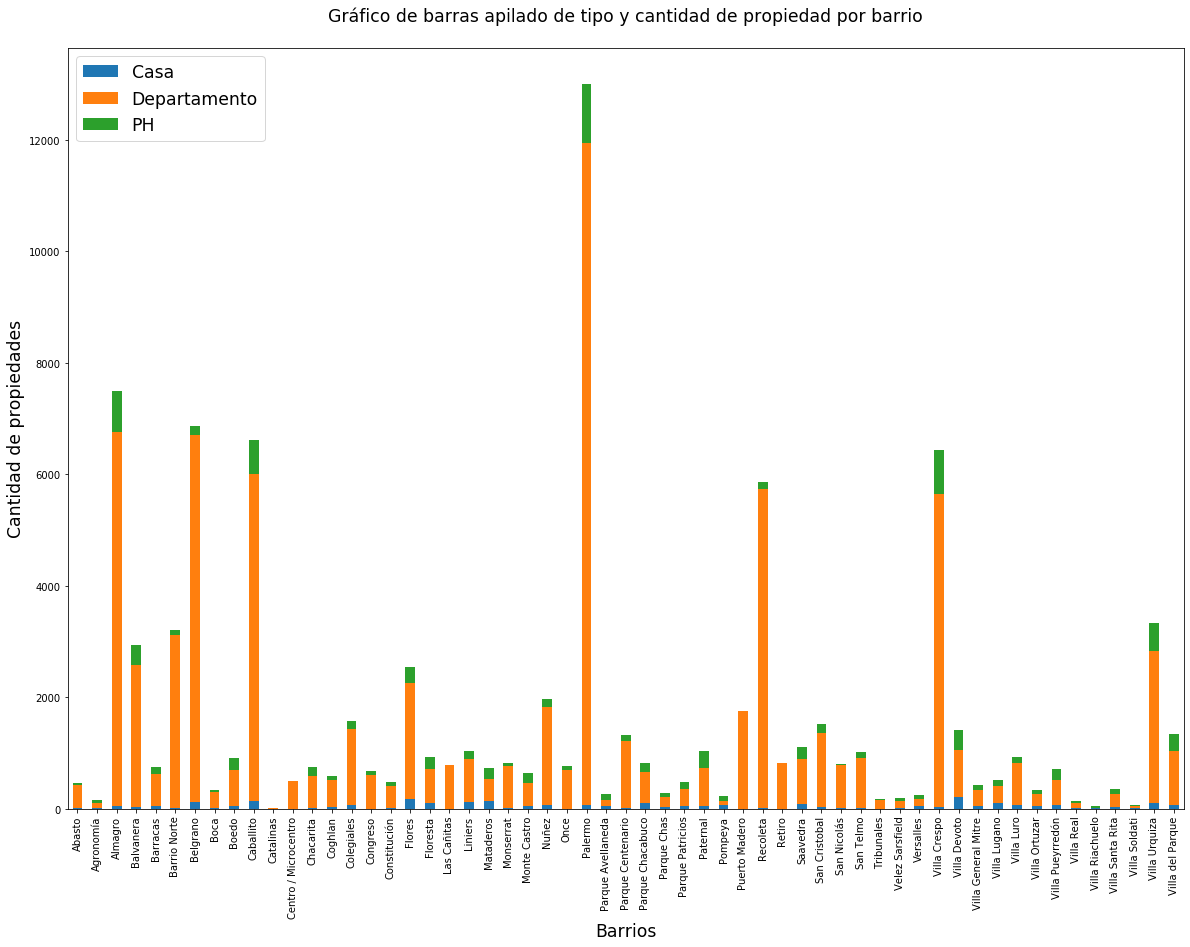

In [80]:
#Defino el dataset
df_desafio = df.loc[((df['property_type'] == 'Departamento') |
                   (df['property_type'] == 'Casa') |
                   (df['property_type'] == 'PH')) & 
                   (df['l2'] == 'Capital Federal')]
df_desafio = df_desafio.loc [:, ['property_type', 'l3']]

#Genero la tabla y realizo el gráfico
barrios_prop = df_desafio.groupby(['l3', 'property_type']).count()
barrios_prop['count'] = df_desafio.groupby(['l3', 'property_type'])[['l3']].count()

pivot_barrios = pd.pivot_table(barrios_prop, index='l3', columns='property_type', values='count')
pivot_barrios

pivot_barrios.plot.bar(stacked=True, figsize=(20,14))
plt.legend(fontsize='xx-large', loc='upper left')
#plt.xticks(fontsize = 'large')
#plt.yticks(fontsize = 'large')
plt.xlabel('Barrios', fontsize='xx-large')
plt.ylabel('Cantidad de propiedades', fontsize='xx-large')
plt.title('Gráfico de barras apilado de tipo y cantidad de propiedad por barrio\n',fontsize='xx-large')

**Mi última pregunta fue: ¿Es posible hacer una geolocalización de las propiedades?**

Para responder esta pregunta, hice una selección de datos del dataset, para que se pueda visualizar (es sólo demostrativo). Se podría aplicar para todo el dataset.

In [81]:
df_lat_lon = df[300:599]
df_lat_lon = df_lat_lon[df_lat_lon['lat'].notna()]
df_lat_lon = df_lat_lon[df_lat_lon['lon'].notna()]

In [82]:
colors = {'Casa':'red', 'Departamento':'green', 'PH':'black', 'Lote':'white', 'Casa de campo':'pink', 
          'Oficina':'yellow', 'Otro': 'orange','Local comercial':'purple', 'Cochera': 'grey', 'Depósito':'blue'}
map_res = folium.Map(location=[-34.604896, -58.4653036762513], zoom_start=9)

df_lat_lon.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lon"]], 
                                              radius=3,fill_opacity=1, color=colors[row['property_type']], 
                                              fill_color=colors[row['property_type']]).add_to(map_res), axis=1)
map_res

En el mapa de arriba se pueden observar la geolocalización de las propiedades selectas del dataset. 

Puntos verdes: departamentos 

Puntos rojos: casas

Puntos negros: PH

Puntos blancos: lotes

Puntos rosas: casas de campo

Puntos amarillos: oficinas

Puntos naranjas: otros

Puntos púpuras: locales comercial

Puntos grises: cocheras

Puntos azules: depósitos

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [83]:
#Cargo el dataset
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

In [84]:
#Filtro por las condiciones solicitadas
df_ml = df.loc[((df['property_type'] == 'Departamento') |
                (df['property_type'] == 'Casa') |
                (df['property_type'] == 'PH')) & 
                (df['l2'] == 'Capital Federal') &
                (df['surface_total'] <= 1000) &
                (df['surface_total'] >= 15) &
                (df['price'] <= 4000000)]
df_ml = df_ml.loc [:, ['rooms', 'bedrooms','bathrooms', 'surface_total', 'surface_covered', 'price']]
df_ml = df_ml.dropna(axis=0)

df_ml.shape

(81019, 6)

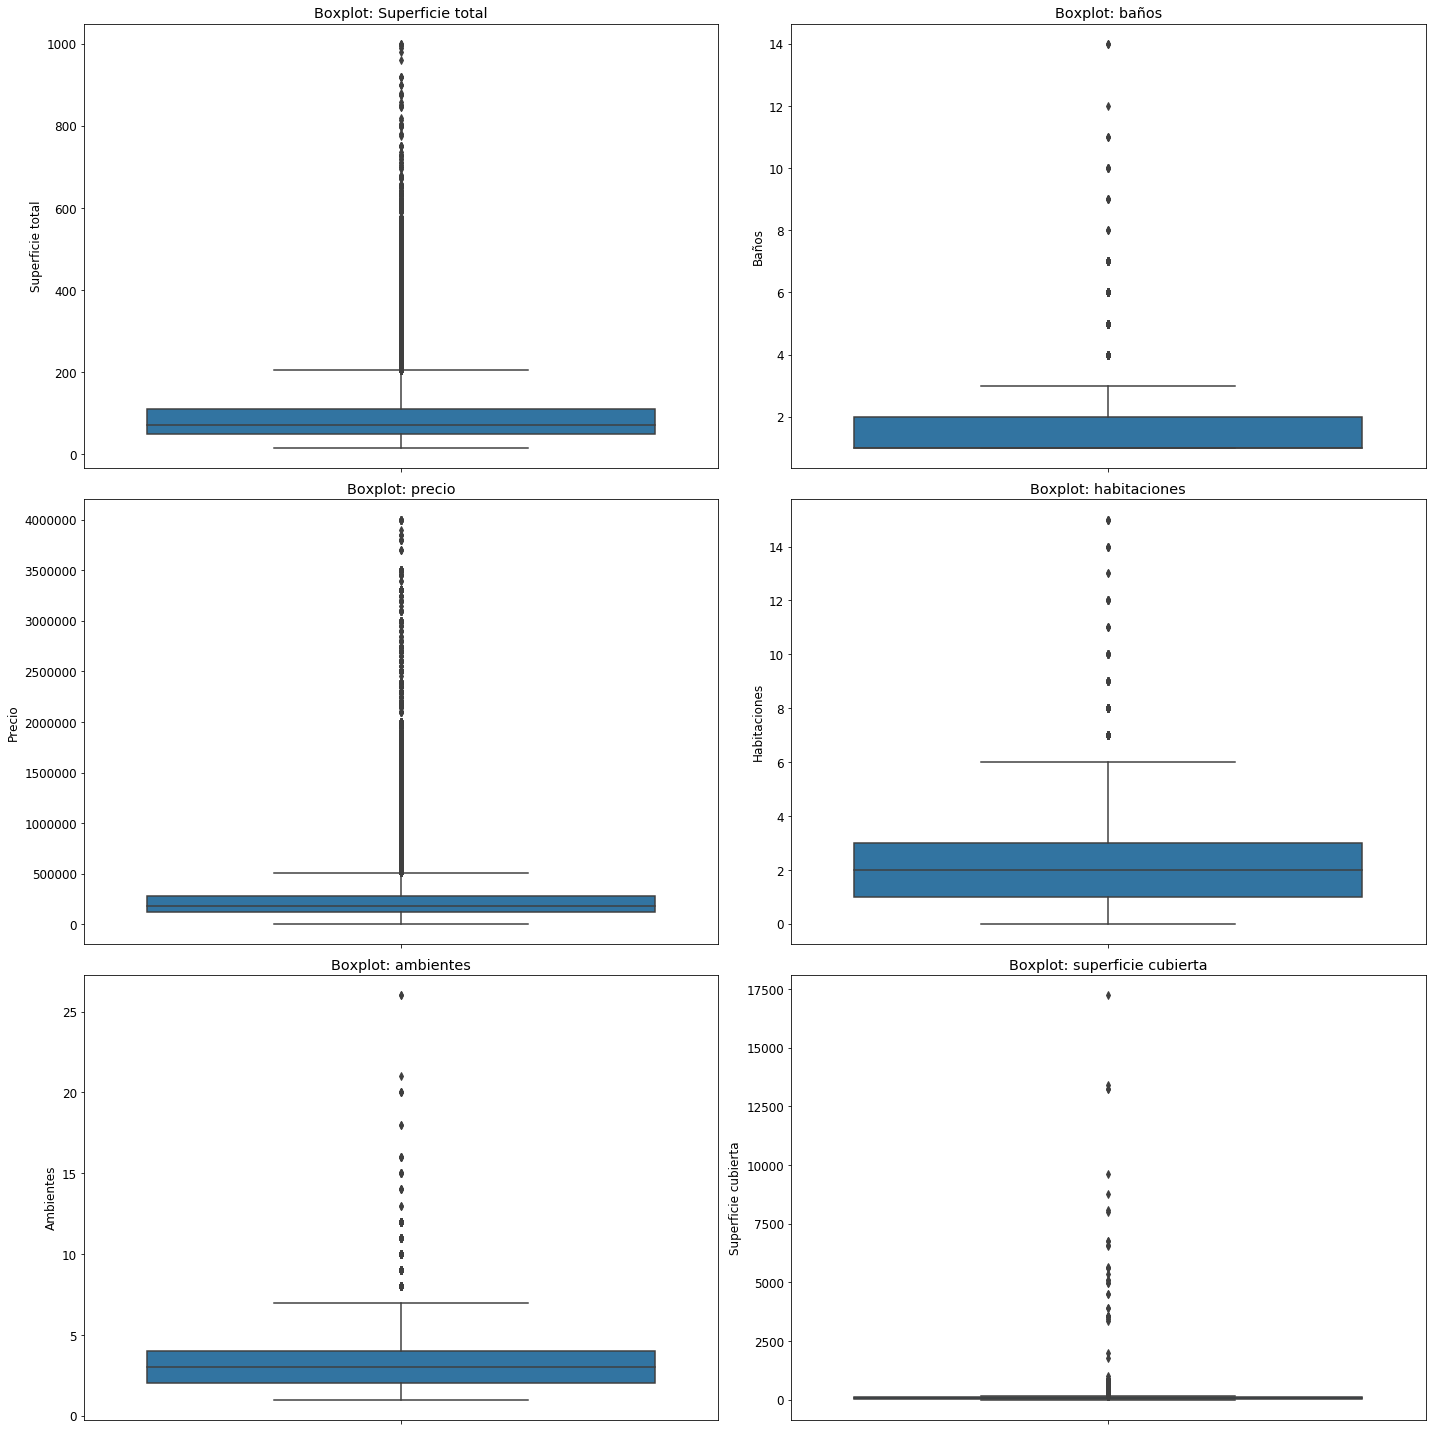

In [85]:
#Boxplot para superficie total, baños, precio, habitaciones, ambientes y superficie cubierta
plt.figure(figsize = (20,20))
gs = gridspec.GridSpec(3, 2, width_ratios=[1,1])

ax1 = plt.subplot(gs[0])
sns.boxplot(data = df_ml, y = 'surface_total')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.title ('Boxplot: Superficie total', fontsize = 'x-large')
plt.ylabel('Superficie total', fontsize = 'large')

ax2 = plt.subplot(gs[1])
sns.boxplot(data = df_ml, y = 'bathrooms')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.title ('Boxplot: baños', fontsize = 'x-large')
plt.ylabel('Baños', fontsize = 'large')

ax3 = plt.subplot(gs[2])
sns.boxplot(data = df_ml, y = 'price')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.title ('Boxplot: precio', fontsize = 'x-large')
plt.ylabel('Precio', fontsize = 'large')

ax4 = plt.subplot(gs[3])
sns.boxplot(data = df_ml, y = 'bedrooms')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.title ('Boxplot: habitaciones', fontsize = 'x-large')
plt.ylabel('Habitaciones', fontsize = 'large')

ax5 = plt.subplot(gs[4])
sns.boxplot(data = df_ml, y = 'rooms')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.title ('Boxplot: ambientes', fontsize = 'x-large')
plt.ylabel('Ambientes', fontsize = 'large')

ax6= plt.subplot(gs[5])
sns.boxplot(data = df_ml, y = 'surface_covered')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.title ('Boxplot: superficie cubierta', fontsize = 'x-large')
plt.ylabel('Superficie cubierta', fontsize = 'large')

plt.tight_layout()

**Métrica para elegir**

MAE: No es muy sensible a los valores atípicos en comparación con MSE, ya que no castiga los grandes errores. Cuanto menor sea el valor, mejor es el rendimiento del modelo.

MSE: es una de las métricas más utilizadas, pero menos útil cuando una sola predicción incorrecta arruinaría las capacidades de predicción de todo el modelo, es decir, cuando el conjunto de datos contiene mucho ruido. 

RMSE: los errores se cuadran antes de promediarlos. Básicamente, esto implica que RMSE asigna un mayor peso a los errores más grandes. Esto indica que RMSE es mucho más útil cuando hay grandes errores y afectan drásticamente el rendimiento del modelo. También en esta métrica, cuanto menor sea el valor, mejor es el rendimiento del modelo.

El problema de los valores atípicos puede jugar un rol importante en que métrica de error usar.

En este dataset, no se realizó una evaluación de los outliers, y tal como se ve en los boxplot, existen outliers.

**Ya que el MAE es mas robusto con los outliers (no hace uso de los cuadrados), decidí usar esta métrica.**

**Modelo Benchmark**

Para crear el modelo benchmark, uso la media de precio.

In [86]:
#Voy a seleccionar las variables predictoras (X) y la variables a predecir (y)
X = df_ml.loc[:,['surface_total','surface_covered','rooms','bedrooms','bathrooms']]
y = df_ml.price

In [87]:
#Hago la división de los datos para entrenamiento y testeo (30% para testeo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

Modelo:benchmark
MAE train: 161790.6776958093
MAE test: 156653.38267676282


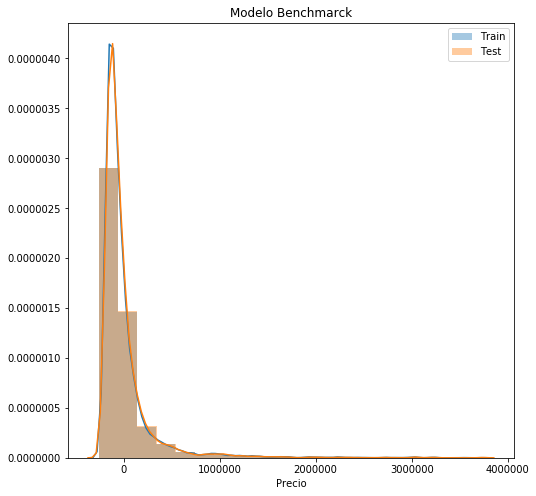

In [88]:
#Grafico la distribución de los errores

benchmark_model_train = np.ones(y_train.shape[0]) * y_train.mean()
benchmark_model_test = np.ones(y_test.shape[0]) * y_test.mean()

mae_train_benchmarck = mean_absolute_error(y_train, benchmark_model_train)
mae_test_benchmarck = mean_absolute_error(y_test, benchmark_model_test)                           

plt.figure(figsize=(8,8))
sns.distplot(y_train - benchmark_model_train, bins=20, label="Train")
sns.distplot(y_test - benchmark_model_test, bins=20, label="Test")
plt.title('Modelo Benchmarck')
plt.xlabel('Precio')
plt.legend()

print('Modelo:benchmark')
print('MAE train:', mae_train_benchmarck)
print('MAE test:', mae_test_benchmarck) 
bm = {'Modelo':'BM','MAE_train':mae_train_benchmarck,'MAE_test': mae_test_benchmarck}

Ahora voy a entrenar un modelo de árbol de **decisión (DT) con hiperparámetro profundidad a mi elección (3)**. El modelo debe ser de regresión, ya que la variable a predecir ('precio') es continua.

In [89]:
#Voy a seleccionar las variables predictoras (X) y la variables a predecir (y)
X = df_ml.loc[:,['surface_total','surface_covered','rooms','bedrooms','bathrooms']]
y = df_ml.price

In [90]:
#Hago la división de los datos para entrenamiento y testeo (30% para testeo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [91]:
#Modelo de Árbol de decisión.
tree_regressor = DecisionTreeRegressor(max_depth = 3, random_state = 1)

#Ajusto (entreno) el modelo
tree_regressor.fit(X_train, y_train)

#Valores predichos
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

Modelo: Árbol de Decisión
Error absoluto promedio en Train: 92981.17292772613
Error absoluto promedio en Test: 89566.34544378842


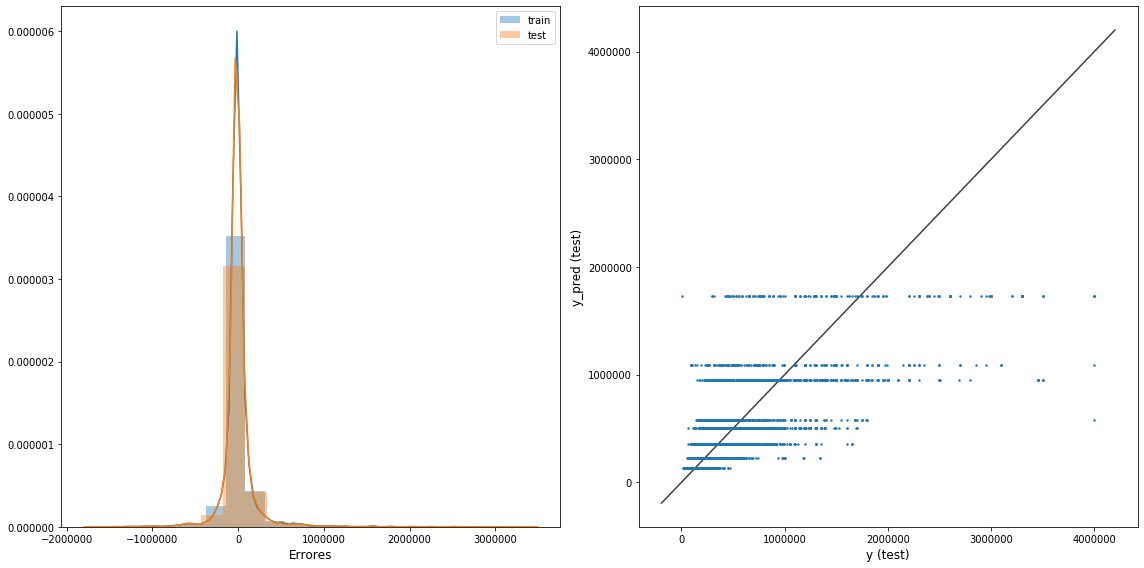

In [92]:
#Grafico los errores 

#Grafico los valores de 'y predichos' en función de 'y real' para el test data
  
def graficos_DT (y_train_pred_def, y_test_pred_def, y_train_def, y_test_def):
    
    print('Modelo: Árbol de Decisión')

    mae_train= mean_absolute_error(y_train_def, y_train_pred_def)
    mae_test = mean_absolute_error(y_test_def, y_test_pred_def)
    print(f'Error absoluto promedio en Train: {mae_train}')
    print(f'Error absoluto promedio en Test: {mae_test}')

    plt.figure(figsize = (16,8))

    plt.subplot(1,2,1)
    sns.distplot(y_train_def - y_train_pred_def, bins = 20, label = 'train')
    sns.distplot(y_test_def - y_test_pred_def, bins = 20, label = 'test')
    plt.xlabel('Errores', fontsize = 'large')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test_def,y_test_pred_def, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), 
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)', fontsize = 'large')
    plt.ylabel('y_pred (test)', fontsize = 'large')

    plt.tight_layout()
    plt.show()
    
graficos_DT(y_train_pred, y_test_pred, y_train, y_test)

**Para optimizar el hiperparámetro profundidad: lo haré a través de ScikitLearn utilizando GridSearchCV.**

**Para los árboles de decisión definí 'params' dentro de GridsearchCV, para que genere diferentes modelos, para ello utilicé max_depth iterando en profundidades entre  1 y 30, y luego seleccioné el mejor hiperparámetro basado en el mejor estimador (best_estimator_ ) sugerido por la librería**

**Optimizando el mejor hiperparámetro a través de GridSearchCV**

In [93]:
#Voy a seleccionar las variables predictoras (X) y la variables a predecir (y)
X = df_ml.loc[:,['surface_total','surface_covered','rooms','bedrooms','bathrooms']]
y = df_ml.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1) 

params = {'max_depth':np.arange(1,31)}
dt = DecisionTreeRegressor(random_state=1)
model = GridSearchCV(dt, params, scoring= 'neg_mean_absolute_error')
model.fit(X_train,y_train)
model.best_estimator_
print('Max_depth =',model.best_estimator_.max_depth)

tree_regressor = model.best_estimator_

#Valores predichos
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

Max_depth = 25


Modelo: Árbol de Decisión
Error absoluto promedio en Train: 23721.712538651478
Error absoluto promedio en Test: 49747.683732641075


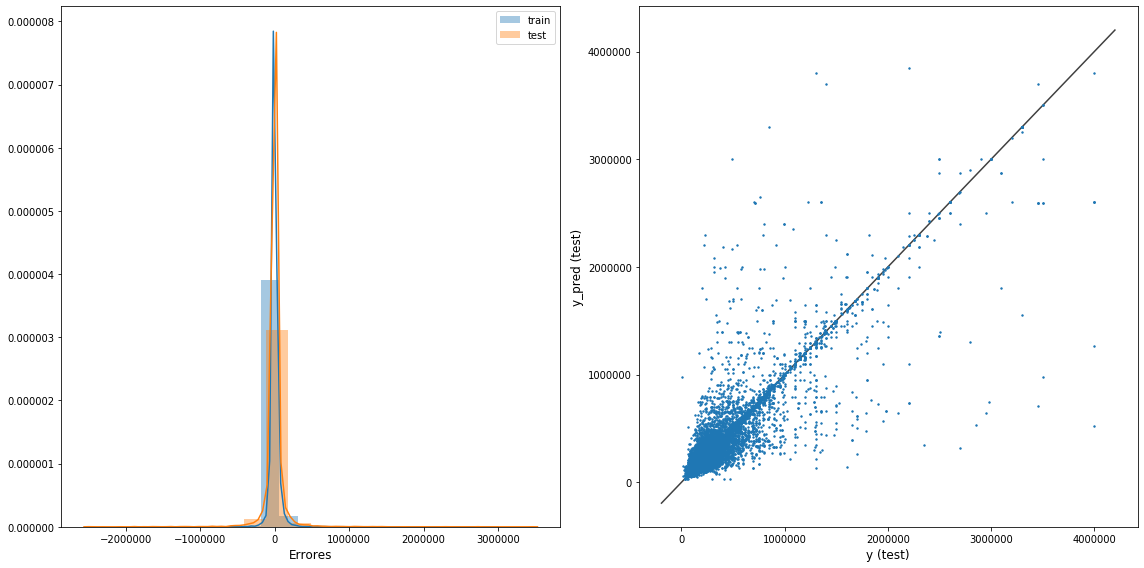

In [94]:
#Grafico los errores 

#Grafico los valores de 'y predichos' en función de 'y real' para el test data
  
def graficos_DT (y_train_pred_def, y_test_pred_def, y_train_def, y_test_def):
    
    print('Modelo: Árbol de Decisión')

    mae_train= mean_absolute_error(y_train_def, y_train_pred_def)
    mae_test = mean_absolute_error(y_test_def, y_test_pred_def)
    print(f'Error absoluto promedio en Train: {mae_train}')
    print(f'Error absoluto promedio en Test: {mae_test}')

    plt.figure(figsize = (16,8))

    plt.subplot(1,2,1)
    sns.distplot(y_train_def - y_train_pred_def, bins = 20, label = 'train')
    sns.distplot(y_test_def - y_test_pred_def, bins = 20, label = 'test')
    plt.xlabel('Errores', fontsize = 'large')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test_def,y_test_pred_def, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), 
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)', fontsize = 'large')
    plt.ylabel('y_pred (test)', fontsize = 'large')

    plt.tight_layout()
    plt.show()
    
graficos_DT(y_train_pred, y_test_pred, y_train, y_test) 

Ahora voy a entrenar un modelo de árbol de **vecinos mas cercanos (kNN) con hiperparámetro número de vecinos iniciales a elección (5)**. El modelo debe ser de regresión, ya que la variable a predecir ('precio') es continua.

In [95]:
#Voy a seleccionar las variables predictoras (X) y la variables a predecir (y)
X = df_ml.loc[:,['surface_total','surface_covered','rooms','bedrooms','bathrooms']]
y = df_ml.price

In [96]:
#Hago la división de los datos para entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

El valor de MAE train es 52349.87859926296
El valor de MAE test es 60916.688315642234


Text(0.5, 0, 'Precio')

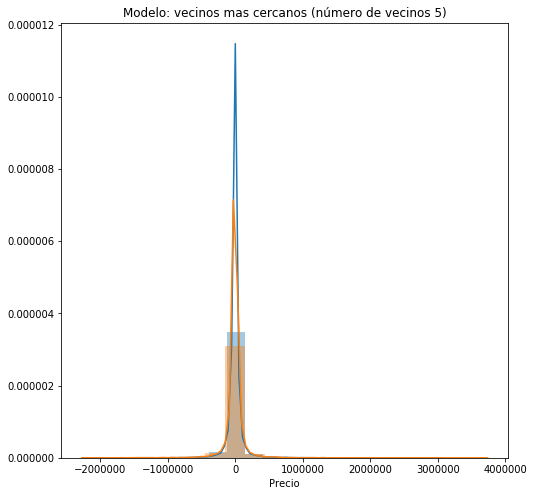

In [97]:
#Modelo de vecinos mas cercanos. Elegí como parámetro inicial de vecinos: 5
knn_regressor = KNeighborsRegressor(n_neighbors=5) 

#Ajusto(entreno) el modelo
knn_regressor.fit(X_train, y_train)

#Valores predichos
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

#Calculo del MAE para el train y test data
mae_train= mean_absolute_error(y_train, y_train_pred)
print('El valor de MAE train es',mae_train)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('El valor de MAE test es',mae_test)

#Grafico la distribución de los errores
plt.figure(figsize=(8,8))
sns.distplot(y_train - y_train_pred, bins=20, label="Train")
sns.distplot(y_test - y_test_pred, bins=20, label="Test")
plt.title('Modelo: vecinos mas cercanos (número de vecinos 5)')
plt.xlabel('Precio')

**Optimizando el mejor hiperparámetro a través de un GridSearchCV**

**Para los vecinos mas cercanos definí 'params' dentro de GridsearchCV, para que genere diferentes modelos, para ello utilicé n_neighbors iterando en profundidades entre  1 y 30, y luego seleccioné el mejor hiperparámetro basado en el mejor estimador (best_estimator_ ) sugerido por la librería**

In [98]:
#Voy a seleccionar las variables predictoras (X) y la variables a predecir (y)
X = df_ml.loc[:,['surface_total','surface_covered','rooms','bedrooms','bathrooms']]
y = df_ml.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

params = {'n_neighbors':np.arange(1,31)}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, scoring= 'neg_mean_absolute_error')
model.fit(X_train,y_train)
model.best_estimator_
print('Max_depth =',model.best_estimator_.n_neighbors)

knn_regressor = model.best_estimator_

#Valores predichos
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

Max_depth = 1


Modelo: Árbol de Decisión
Error absoluto promedio en Train: 28920.662105690055
Error absoluto promedio en Test: 56742.97720727392


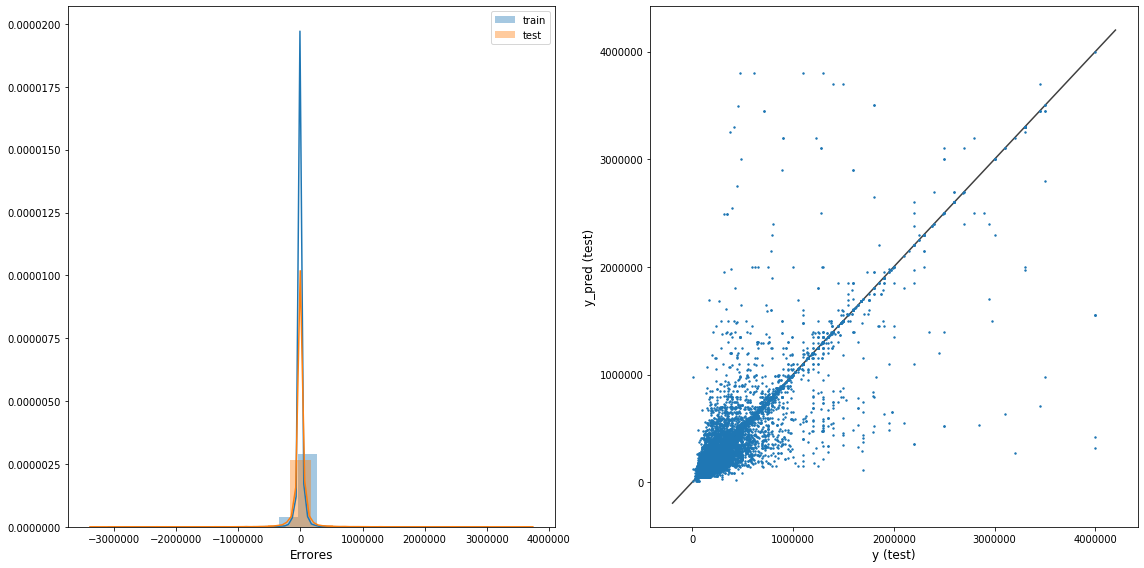

In [99]:
#Grafico los errores 

#Grafico los valores de 'y predichos' en función de 'y real' para el test data
  
def graficos_DT (y_train_pred_def, y_test_pred_def, y_train_def, y_test_def):
    
    print('Modelo: Árbol de Decisión')

    mae_train= mean_absolute_error(y_train_def, y_train_pred_def)
    mae_test = mean_absolute_error(y_test_def, y_test_pred_def)
    print(f'Error absoluto promedio en Train: {mae_train}')
    print(f'Error absoluto promedio en Test: {mae_test}')

    plt.figure(figsize = (16,8))

    plt.subplot(1,2,1)
    sns.distplot(y_train_def - y_train_pred_def, bins = 20, label = 'train')
    sns.distplot(y_test_def - y_test_pred_def, bins = 20, label = 'test')
    plt.xlabel('Errores', fontsize = 'large')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test_def,y_test_pred_def, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), 
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)', fontsize = 'large')
    plt.ylabel('y_pred (test)', fontsize = 'large')

    plt.tight_layout()
    plt.show()
    
graficos_DT(y_train_pred, y_test_pred, y_train, y_test) 

¿Cuál modelo elijo?

Modelo: benchmark 
- MAE train: 161790.6776958093
- MAE test: 156653.38267676282

DT con hiperparámetro optimizado (max_depth=25)

- El valor de MAE train es 23721.712538651478
- El valor de MAE test es 49747.683732641075


kNN con hiperparámetro optimizado (n_neighbors=1)
- El valor de MAE train es 28920.662105690055
- El valor de MAE test es 56742.97720727392

El mejor modelo sería el DT con su hiperparámetro optimizado (25). Sus valores de MAE son mas bajos que el benchmark y que el kNN.

**MEJORA DE LA METODOLOGÍA**

In [100]:
#Calculo la correlación de las variables
df_ml.corr()  #Por default method = 'pearson'

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925604,0.601887,0.725799,0.304407,0.479972
bedrooms,0.925604,1.000000,0.605002,0.695523,0.291140,0.442418
bathrooms,0.601887,0.605002,1.000000,0.651924,0.275936,0.638737
surface_total,0.725799,0.695523,0.651924,1.000000,0.375749,0.686459
surface_covered,0.304407,0.291140,0.275936,0.375749,1.000000,0.298212
price,0.479972,0.442418,0.638737,0.686459,0.298212,1.000000


Las variables se correlacionan con la variable precio de la siguiente manera: superficie total (0.69), baños (0.64), ambientes (0.48), habitaciones (0.44) y superficie cubierta (0.30). Considero probar diferentes modelos usando todas las variables menos superficie cubierta, cuya correlación es muy baja.

Iré usarando las diferentes variables que conformarán mi 'X'.

La variable 'y' será precio. 

Como elegí árbol de decisión, trataré de mejorar la metodología variando las variables predictoras.

**DT con superficie total**

**Para los árboles de decisión definí 'params' dentro de GridsearchCV, para que genere diferentes modelos, para ello utilicé max_depth iterando en profundidades entre  1 y 30, y luego seleccioné el mejor hiperparámetro basado en el mejor estimador (best_estimator_ ) sugerido por la librería**

In [101]:
#Voy a seleccionar las variables predictoras (X) y la variables a predecir (y)
X = df_ml.loc[:,['surface_total']]
y = df_ml.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

params = {'max_depth':np.arange(1,31)}

dt = DecisionTreeRegressor(random_state = 1)

model = GridSearchCV(dt, params, scoring= 'neg_mean_absolute_error')
model.fit(X_train,y_train)
model.best_estimator_

print('Max_depth =',model.best_estimator_.max_depth)

tree_regressor = model.best_estimator_

#Valores predichos
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

Max_depth = 18


Modelo: Árbol de Decisión
Error absoluto promedio en Train: 84799.52118694683
Error absoluto promedio en Test: 85151.63251122563


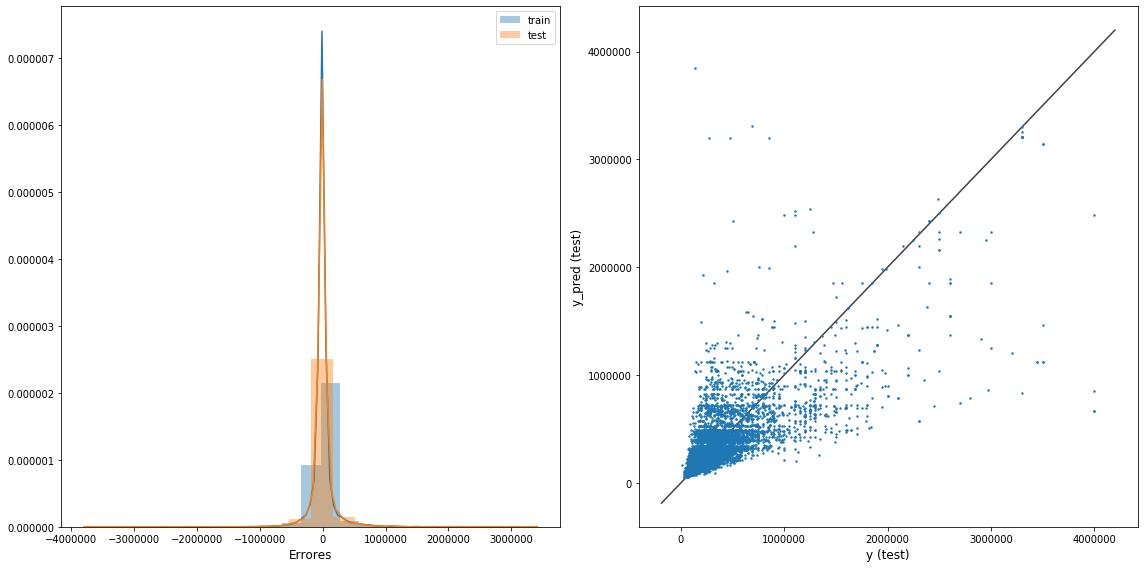

In [102]:
#Grafico los errores 

#Grafico los valores de 'y predichos' en función de 'y real' para el test data
  
def graficos_DT (y_train_pred_def, y_test_pred_def, y_train_def, y_test_def):
    
    print('Modelo: Árbol de Decisión')

    mae_train= mean_absolute_error(y_train_def, y_train_pred_def)
    mae_test = mean_absolute_error(y_test_def, y_test_pred_def)
    print(f'Error absoluto promedio en Train: {mae_train}')
    print(f'Error absoluto promedio en Test: {mae_test}')

    plt.figure(figsize = (16,8))

    plt.subplot(1,2,1)
    sns.distplot(y_train_def - y_train_pred_def, bins = 20, label = 'train')
    sns.distplot(y_test_def - y_test_pred_def, bins = 20, label = 'test')
    plt.xlabel('Errores', fontsize = 'large')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test_def,y_test_pred_def, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), 
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)', fontsize = 'large')
    plt.ylabel('y_pred (test)', fontsize = 'large')

    plt.tight_layout()
    plt.show()
    
    return (mae_train, mae_test)

mae_train, mae_test = graficos_DT(y_train_pred, y_test_pred, y_train, y_test) 

   
dt_1 = {'Modelo':'DT- ST','MAE_train':mae_train,'MAE_test': mae_test}

**DT con superficie total y baños**

In [103]:
#Voy a seleccionar las variables predictoras (X) y la variables a predecir (y)
X = df_ml.loc[:,['surface_total', 'bathrooms']]
y = df_ml.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

params = {'max_depth':np.arange(1,31)}

dt = DecisionTreeRegressor(random_state=1)

model = GridSearchCV(dt, params, scoring= 'neg_mean_absolute_error')
model.fit(X_train,y_train)
model.best_estimator_

print('Max_depth =',model.best_estimator_.max_depth)

tree_regressor = model.best_estimator_

#Valores predichos
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

Max_depth = 24


Modelo: Árbol de Decisión
Error absoluto promedio en Train: 67647.16566188009
Error absoluto promedio en Test: 72068.37062222126


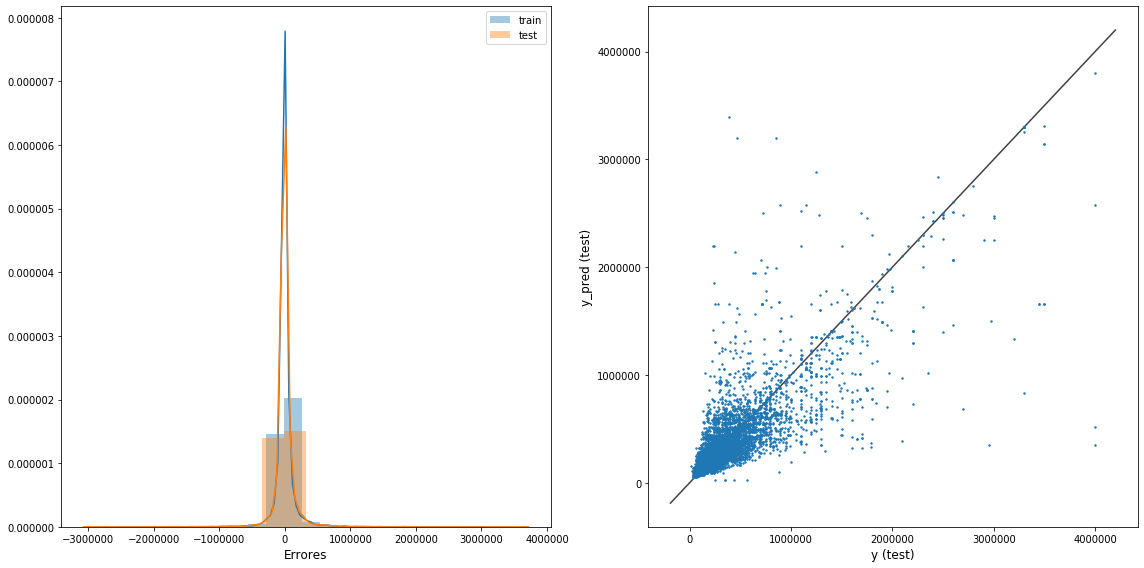

In [104]:
#Grafico los errores

#Grafico los valores de 'y predichos' en función de 'y real' para el test data

mae_train, mae_test = graficos_DT(y_train_pred, y_test_pred, y_train, y_test) 

dt_2 = {'Modelo':'DT- ST y B','MAE_train':mae_train,'MAE_test': mae_test}

**DT con superficie total, baños y ambientes**

In [105]:
#Voy a seleccionar las variables predictoras (X) y la variables a predecir (y)
X = df_ml.loc[:,['surface_total', 'bathrooms', 'rooms']]
y = df_ml.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

params = {'max_depth':np.arange(1,31)}

dt = DecisionTreeRegressor(random_state=1)

model = GridSearchCV(dt, params, scoring= 'neg_mean_absolute_error')
model.fit(X_train,y_train)
model.best_estimator_

print('Max_depth =',model.best_estimator_.max_depth)

tree_regressor = model.best_estimator_

#Valores predichos
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

Max_depth = 24


Modelo: Árbol de Decisión
Error absoluto promedio en Train: 53254.65737901047
Error absoluto promedio en Test: 65766.24024124598


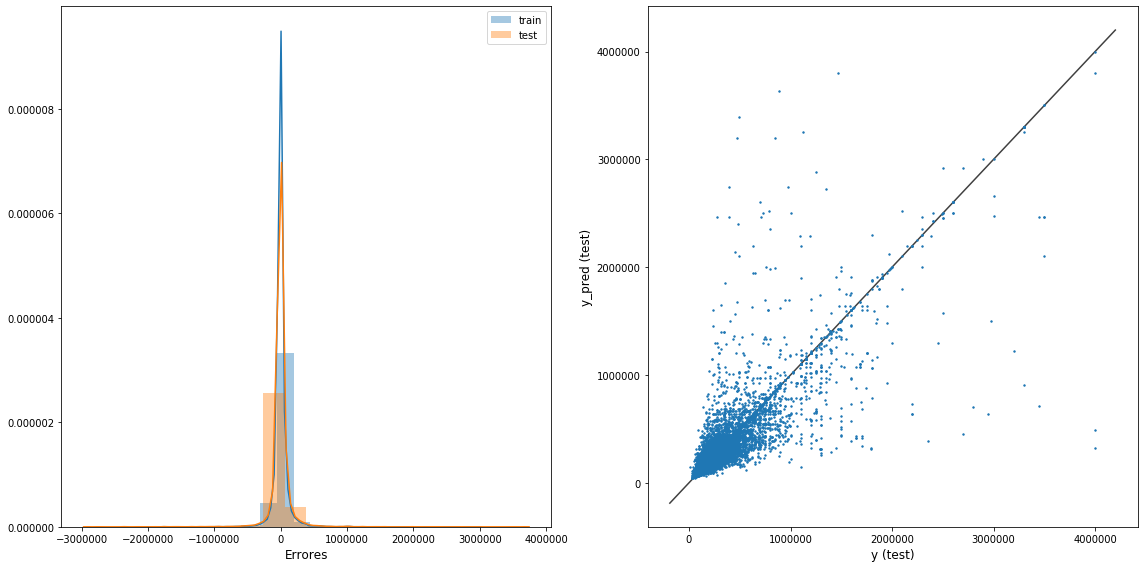

In [106]:
#Grafico los errores

#Grafico los valores de 'y predichos' en función de 'y real' para el test data

mae_train, mae_test = graficos_DT(y_train_pred, y_test_pred, y_train, y_test) 

dt_3 = {'Modelo':'DT- ST, B y A','MAE_train':mae_train,'MAE_test': mae_test}

**DT con superficie total, baños y habitaciones**

In [107]:
#Voy a seleccionar las variables predictoras (X) y la variables a predecir (y)
X = df_ml.loc[:,['surface_total', 'bathrooms', 'bedrooms']]
y = df_ml.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

params = {'max_depth':np.arange(1,31)}

dt = DecisionTreeRegressor(random_state = 1)

model = GridSearchCV(dt, params, scoring= 'neg_mean_absolute_error')
model.fit(X_train,y_train)
model.best_estimator_

print('Max_depth =',model.best_estimator_.max_depth)

tree_regressor = model.best_estimator_

#Valores predichos
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

Max_depth = 23


Modelo: Árbol de Decisión
Error absoluto promedio en Train: 55543.30255892951
Error absoluto promedio en Test: 65617.29419946957


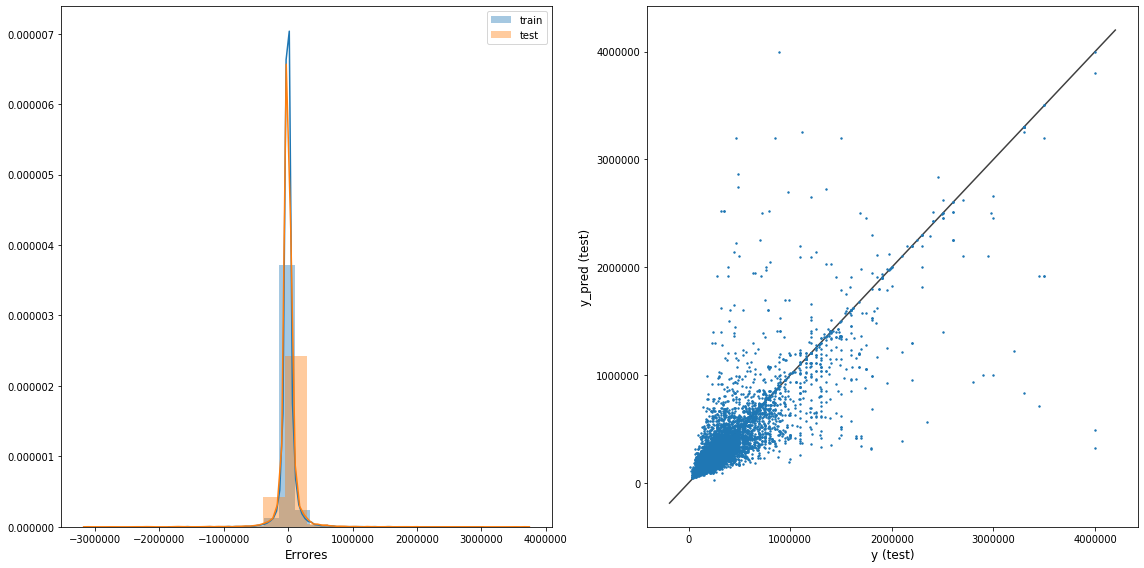

In [108]:
#Grafico los errores

#Grafico los valores de 'y predichos' en función de 'y real' para el test data

mae_train, mae_test = graficos_DT(y_train_pred, y_test_pred, y_train, y_test) 

dt_4 = {'Modelo':'DT- ST, B y H','MAE_train':mae_train,'MAE_test': mae_test}

**DT con superficie total, baños, ambientes y habitaciones**

In [109]:
#Voy a seleccionar las variables predictoras (X) y la variables a predecir (y)
X = df_ml.loc[:,['surface_total', 'bathrooms', 'rooms', 'bedrooms']]
y = df_ml.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

params = {'max_depth':np.arange(1,31)}

dt = DecisionTreeRegressor(random_state=1)

model = GridSearchCV(dt, params, scoring= 'neg_mean_absolute_error')
model.fit(X_train,y_train)
model.best_estimator_

print('Max_depth =',model.best_estimator_.max_depth)

tree_regressor = model.best_estimator_

#Valores predichos
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

Max_depth = 23


Modelo: Árbol de Decisión
Error absoluto promedio en Train: 48930.16926601443
Error absoluto promedio en Test: 62773.7334647527


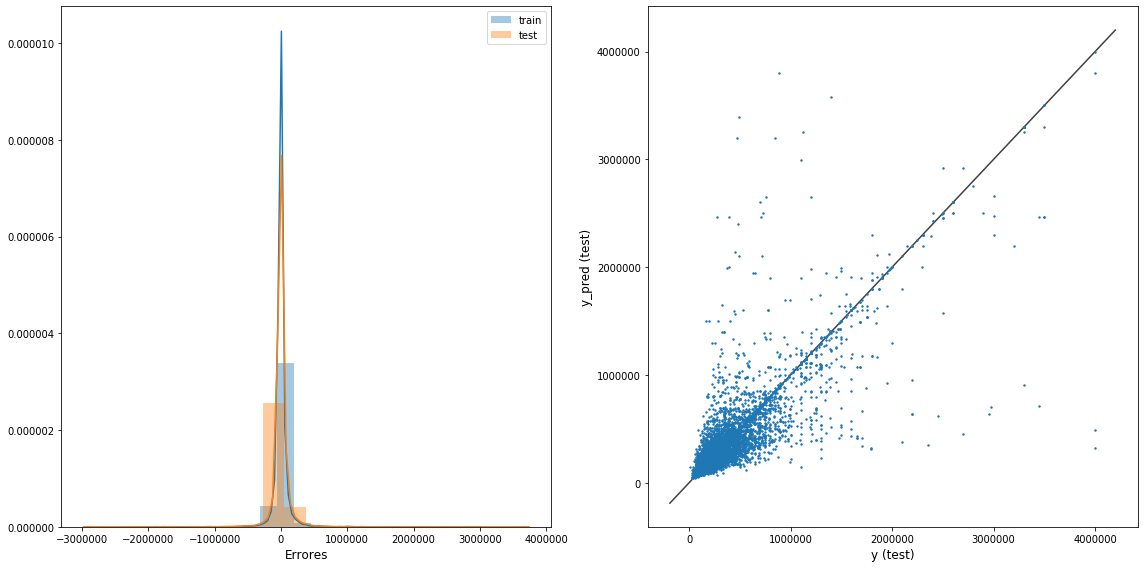

In [110]:
#Grafico los errores

#Grafico los valores de 'y predichos' en función de 'y real' para el test data

mae_train, mae_test = graficos_DT(y_train_pred, y_test_pred, y_train, y_test) 

dt_5 = {'Modelo':'DT- ST, B, H y A','MAE_train':mae_train,'MAE_test': mae_test}

Text(0, 0.5, 'MAE')

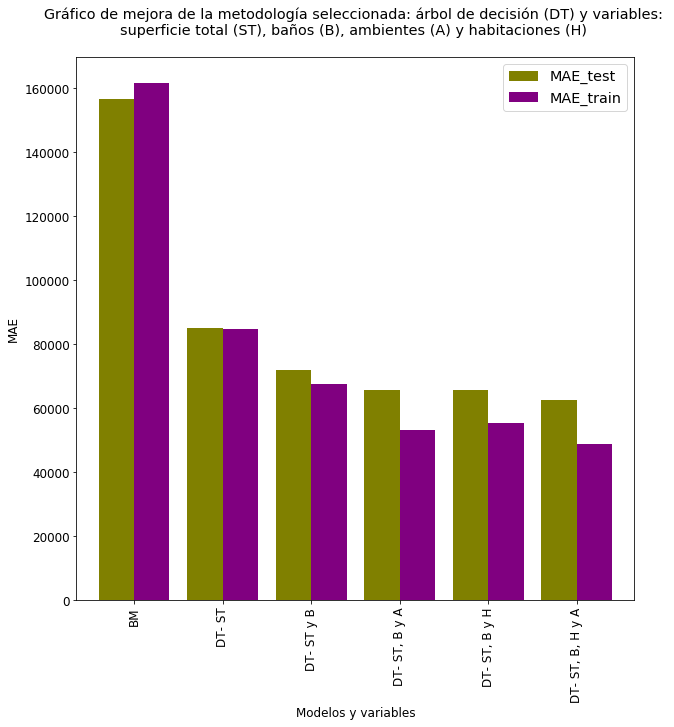

In [111]:
#Unifico los diccionarios y los transformo en un dataframe
dicts_dt = [bm, dt_1, dt_2, dt_3, dt_4, dt_5]
dt_dict = pd.DataFrame.from_records(dicts_dt).fillna(0)

#Grafico
dt_dict.plot(x="Modelo", y=["MAE_test", "MAE_train"], kind="bar", figsize =[10,10], color = ['olive', 'purple'],
             width = 0.8, fontsize = 'large')
plt.title('Gráfico de mejora de la metodología seleccionada: árbol de decisión (DT) y variables: \n\
superficie total (ST), baños (B), ambientes (A) y habitaciones (H) \n', fontsize = 'x-large')
plt.legend(fontsize= 'x-large')
plt.xlabel('Modelos y variables', fontsize = 'large')
plt.ylabel('MAE', fontsize = 'large')

**Entre los modelos entrenados para mejorar la metodología del árbol de decisión, ¿cuál elegirías para utilizar?¿Por qué?**

Elegiría el Dt con superficie total y baños (con su hiperparámetro optimizado en 24), ya que los errores son mas bajos, no hay tanta diferencia del MAE entre el set de entrenamiento y el de testeo. La incorporación de una tercer o cuarta variable, no genera mejores resultados (los MAE del test son muy similares).

**Ser crítico/a con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?**

Creo que la información del tipo de propiedad podría ayudar a la predicción. 

Tmabién (y aunque en el dataset no se dispone de la data), se podría considerar la antigüedad del inmueble. 


En el caso de este dataset, la información de baños y ambientes, para ser usado en el modelo de ML, actuaría como repetida, ya que las correlaciones con la variable precio son similares y al momento de utilizarlas en el modelo, los resultados dan similares usando una o la otra.